Before we get started, we would like to install all the necessary packages we would need in order to run our code successfully. The code in the following cell has been taken from one of the Homework assigments.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# This silences some warnings.
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Stuff for fancy widgets.
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Renound in pyschological studies, the Big 5 test uses statements to assess one's personality traits in 5 broad catergories:extraversion, agreeableness, emotional stability, conscientiousness and intellect/imagination. This project is interested in the potential impact extraneous variables such as race, age, handedness could have on defining personality traits, as well as outlining any patterns that may appear. As a future use, this may be beneficial for targeting individual traits (for social support or to infiltrate those at risk of mental illness, early, for example). 

In [2]:
# Read personality data set
person = pd.read_csv('data.csv', sep="\t")

In [3]:
# See the top values of the data frame
person.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


The keys used for the personality test data are as follows:
E = Extraversion;
N = Emotional Stability;
A = Agreeableness;
C = Conscientiousness;
O = Intellect/Imagination.

For race, numbers are assigned to those of a specific race and it is as follows: 
1 = Mixed Race;
2 = Arctic (Siberian, Eskimo);
3 = Caucasian (European);
4 = Caucasian (Indian);
5 = Caucasian (Middle East);
6 = Caucasian (North African, Other);
7 = Indigenous Australian;
8 = Native American;
9 = North East Asian (Mongol, Tibetan, Korean, Japanese, etc);
10 = Pacific (Polynesian, Micronesian, etc);
11 = South East Asian (Chinese, Thai, Malay, Filipino, etc);
12 = West African, Bushmen, Ethiopian;
13 = Other;
With 0 being missed.

In some of the tables, the word 'Engnat' can be observed. This was shorted from the question "Is English your native language?", where individauls answered 1 for yes, and 2 for no, with 0 being missed

Gender was also assigned numbers, with number 1 translating to being male, 2 being female, 3 being other, and 0 being missed

Like gender, hand was also assigned with numbers which translated into which was the participant's dominant hand e.g, if the participant was right-handed, they responded with 1; if the individual was left-handed, they responded with 2; and if the individual was ambidextrous, they responded with 3. Once again, 0 was used to show that the question had been missed.

Upon reading the key, we discovered that the scale seemed to be somewhat outdated. For example, it is now racist/inappropriate to call people 'Eskimo' when referring to races from the Arctic region. Also, we discovered that the term 'caucasian' was used here in an outdated fashion, as nowadays 'caucasion' is used to refer to white people only, rather than referring to those of  Indian and Middle Eastern ethnicities.

Later on in our project we discovered that some people had entered their birth year instead of their age, so this needed to be recified first so we didn't run into any problems later on in our analysis.

In [4]:
# The following iteration code took everyone who entered their birth year and changed it to their age instead
x=[]
for i in person['age']:
    # The following code takes any age that is longer than 4 digits e.g. 1997 or 1956 and subtracts that from 2020
    # to get their age. We chose 2020 instead of 2021 as, since we don't have individuals' birth dates it would be more
    # appropriate to assume that their Birthday hasn't passed as we are only halfway through 2021
    if len(str(i)) == 4:
        x.append((2020-i))
        
    else:
        x.append(i)

person["age"] = pd.DataFrame(x)
person.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


We then discovered that some individual's had entered an absurd value for their age e.g. 999999. Because we had no way to calculate what these individuals' age actually were, we decided to drop their data from the dataset. We decided to drop everyone over the age of 116, as this is the record for the oldest person ever.

In [5]:
# The oldest person ever recorded was 116 years old; therefore, we will not include anyone claiming to be older
# Identify all ages above 116

above_116 = person['age'] > 116

# Just create a new data frame Fas it's easier to visualise the data
a116 = person[above_116]
a116

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
4004,2,999999999,2,3,3,1,CA,5,1,5,...,5,5,5,1,5,1,5,5,5,5
5043,0,208,2,2,1,1,PH,3,3,5,...,4,3,1,2,5,1,3,3,3,5
9987,13,412434,1,3,3,1,US,3,4,2,...,4,1,5,1,4,1,5,3,4,5
11796,3,223,2,1,1,1,PT,3,4,2,...,4,1,4,2,4,1,4,4,5,4
12258,4,211,2,1,1,1,IN,4,4,4,...,3,2,5,1,4,2,5,3,4,4
13565,4,266,2,1,1,1,KR,3,3,4,...,5,2,3,1,3,2,5,3,4,4
15060,3,188,1,2,3,2,US,4,2,3,...,5,2,2,3,3,4,4,5,3,3
15941,3,191,1,1,1,2,US,1,5,1,...,5,1,5,1,4,1,5,5,5,5
15986,3,188,1,2,1,2,US,1,3,3,...,5,2,4,1,5,4,2,5,5,4
18998,1,118,1,2,1,1,US,4,1,4,...,2,2,5,2,4,2,4,2,4,5


In [6]:
# Drop all those with ages above 116

personality = person.drop([4004, 5043, 9987, 11796, 12258, 13565, 15060, 15941, 15986, 18998])
personality.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


We now have a working dataset that we can manipulate to our liking. Our next task was to calculate an individual's total score for each of the five categories, extraversion, emotional stability, agreeableness, conscientiousness, and intellect/imagination. We did this by isolating the specific personality traits and making them into their own data frame. We then created a function which caulcated the sum of the row, giving us a total score for each personality trait.

With each total being calculated, we then added it to our original data frame so we could have all the data in the one place. We also inserted our total score to their appropriate column. After this, we created a final data frame known as 'total_scores' which included all of the relevant data we wanted to investigate along with each individual's total score for each personality trait.

In [7]:
# Create data frame consisting of only the E values from the original data set
E_personality = personality[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10']]
E_personality.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,4,2,5,2,5,1,4,3,5,1
1,2,2,3,3,3,3,1,5,1,5
2,5,1,1,4,5,1,1,5,5,1
3,2,5,2,4,3,4,3,4,4,5
4,3,1,3,3,3,1,3,1,3,5


In [8]:
# Create function which calculates the E score for each person
def calc_E(index):
    E = np.sum(personality.loc[index])
    return E

In [9]:
# Calculate the sum total of the E values for each individual and then insert that as a column into the original 
# data frame
E_personality_score = E_personality.sum(axis=1)
personality.insert(17, 'Total E Score', E_personality_score)
personality.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [10]:
# Create data frame consisting of only the N values from the original data set
N_personality = personality[['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']]
N_personality.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
0,1,5,2,5,1,1,1,1,1,1
1,2,3,4,2,3,4,3,2,2,4
2,5,1,5,5,5,5,5,5,5,5
3,5,4,4,2,4,5,5,5,4,5
4,3,3,3,4,3,3,3,3,3,4


In [11]:
# Create another function which calculates the N score for each person
def calc_N(index):
    N = np.sum(N_personality.loc[index])
    return N

In [12]:
# Calculate the sum total of the N values for each individual and then insert that as a column into the original 
# data frame - maybe we could work out how to put it immediately into the adapted data frame?
N_personality_score = N_personality.sum(axis=1)
personality.insert(27, 'Total N Score', N_personality_score)
personality.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [13]:
# Create data frame consisting of only the A values from the original data set
A_personality = personality[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
A_personality.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,1,5,1,5,2,3,1,5,4,5
1,1,3,3,4,4,4,2,3,4,3
2,5,1,5,5,1,5,1,5,5,5
3,2,5,4,4,3,5,3,4,4,3
4,5,5,3,5,1,5,1,5,5,5


In [14]:
# Create another function which calculates the A score for each person
def calc_A(index):
    A = np.sum(A_personality.loc[index])
    return A

In [15]:
# Calculate the sum total of the A values for each individual and then insert that as a column into the original 
# data frame - maybe we could work out how to put it immediately into the adapted data frame?
A_personality_score = A_personality.sum(axis=1)
personality.insert(37, 'Total A Score', A_personality_score)
personality.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [16]:
# Create data frame consisting of only the C values from the original data set
C_personality = personality[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']]
C_personality.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,4,1,5,1,5,1,4,1,4,5
1,4,1,3,2,3,1,5,1,4,4
2,4,1,5,1,5,1,5,1,5,5
3,3,3,4,5,1,4,5,4,2,3
4,3,1,5,3,3,1,1,3,3,3


In [17]:
# Create another function which calculates the C score for each person
def calc_C(index):
    C = np.sum(C_personality.loc[index])
    return C

In [18]:
# Calculate the sum total of the C values for each individual and then insert that as a column into the original 
# data frame - maybe we could work out how to put it immediately into the adapted data frame?
C_personality_score = C_personality.sum(axis=1)
personality.insert(47, 'Total C Score', C_personality_score)
personality.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [19]:
# Create data frame consisting of only the O values from the original data set
O_personality = personality[['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10']]
O_personality.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,1,3,1,5,1,4,2,5,5
1,3,3,3,3,2,3,3,1,3,2
2,4,5,5,1,5,1,5,5,5,5
3,4,3,5,2,4,2,5,2,5,5
4,3,1,1,1,3,1,3,1,5,3


In [20]:
# Create another function which calculates the O score for each person
def calc_O(index):
    O = np.sum(O_personality.loc[index])
    return O

In [21]:
# Calculate the sum total of the O values for each individual and then insert that as a column into the original 
# data frame - maybe we could work out how to put it immediately into the adapted data frame?
O_personality_score = O_personality.sum(axis=1)
personality.insert(57, 'Total O Score', O_personality_score)
personality.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O2,O3,O4,O5,O6,Total O Score,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,1,3,1,5,1,31,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,2,3,26,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,5,5,1,5,1,41,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,3,5,2,4,2,37,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,1,1,1,3,1,22,3,1,5,3


In [22]:
# Now create a data frame with the desired total scores with the appropriate variables
total_scores = personality[['race', 'age', 'engnat', 'gender', 'hand', 'country', 'Total E Score', 'Total N Score',
                           'Total A Score', 'Total C Score', 'Total O Score']]
total_scores.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
0,3,53,1,1,1,US,32,19,32,31,31
1,13,46,1,2,1,US,28,29,31,28,26
2,1,14,2,2,1,PK,29,46,38,33,41
3,3,19,2,2,1,RO,36,43,37,34,37
4,11,25,2,2,1,US,26,32,40,26,22


We then looked to isolate the different races to allow for easy analysis. This consisted of creating a boolean array and creating new data frames consisting of individuals from a specific race only. We did this 13 times for the 13 different races to allow for comparison. We did not isolate those who missed out their race as, if we included them, we would not be able to analyse their data effectively.

What we aimed to do here was compare how different personality traits compare within a specific race and then to evaluate how this differed between races.

In [23]:
# Create a boolean which selects only one spefic race (in this case, Mixed Race)
mixed_race_peeps = total_scores['race'] == 1
mixed_race = total_scores[mixed_race_peeps]
mixed_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
2,1,14,2,2,1,PK,29,46,38,33,41
28,1,17,1,2,1,US,32,39,33,28,33
30,1,19,1,2,1,US,29,36,38,23,32
40,1,17,1,1,1,US,26,18,34,26,38
92,1,21,1,2,1,ZA,26,14,26,34,34


30.940683879972088
30.903000697836706
32.03070481507327
31.56803907885555
33.27843684577809


Text(0.5, 1.0, 'Mean scores for all personality traits for Mixed Race people')

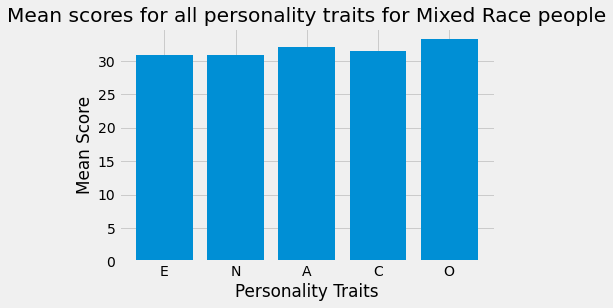

In [24]:
# Get the mean scores of the various personality traits for race == 1 (Mixed Race)

mean_mr_E = np.mean(mixed_race['Total E Score'])
print(mean_mr_E)
mean_mr_N = np.mean(mixed_race['Total N Score'])
print(mean_mr_N)
mean_mr_A = np.mean(mixed_race['Total A Score'])
print(mean_mr_A)
mean_mr_C = np.mean(mixed_race['Total C Score'])
print(mean_mr_C)
mean_mr_O = np.mean(mixed_race['Total O Score'])
print(mean_mr_O)

# Try and create an average of personality scores compared with their specific race
x1 = ['E', 'N', 'A', 'C', 'O']
y1 = [mean_mr_E, mean_mr_N, mean_mr_A, mean_mr_C, mean_mr_O]


# Create a plot and set the scale for the y-axis
mixed_race_score_plot = plt.bar(x1, y1)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Mixed Race people')

In [25]:
# Create a boolean which selects only one spefic race (in this case, Arctic)
arctic_peeps = total_scores['race'] == 2
arctic_race = total_scores[arctic_peeps]
arctic_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
293,2,14,1,1,2,US,22,14,14,14,18
1325,2,21,1,2,1,US,35,21,40,33,36
2294,2,29,2,1,1,DK,29,24,33,30,28
2316,2,22,2,2,1,DK,31,28,42,33,33
4449,2,18,1,1,1,US,34,28,35,36,34


33.15384615384615
27.46153846153846
34.30769230769231
31.384615384615383
33.53846153846154


<BarContainer object of 5 artists>

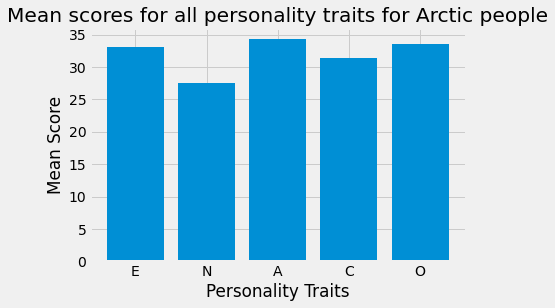

In [26]:
# Get the mean scores of the various personality traits for race == 2 (Arctic)
mean_arctic_E = np.mean(arctic_race['Total E Score'])
print(mean_arctic_E)
mean_arctic_N = np.mean(arctic_race['Total N Score'])
print(mean_arctic_N)
mean_arctic_A = np.mean(arctic_race['Total A Score'])
print(mean_arctic_A)
mean_arctic_C = np.mean(arctic_race['Total C Score'])
print(mean_arctic_C)
mean_arctic_O = np.mean(arctic_race['Total O Score'])
print(mean_arctic_O)

# Try and create an average of personality scores compared with their specific race
x2 = ['E', 'N', 'A', 'C', 'O']
y2 = [mean_arctic_E, mean_arctic_N, mean_arctic_A, mean_arctic_C, mean_arctic_O]

arctic_score_plot = plt.bar(x2, y2)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Arctic people')
arctic_score_plot

In [27]:
# Create a boolean which selects only one spefic race (in this case, Europeans)
europe_peeps = total_scores['race'] == 3
europe_race = total_scores[europe_peeps]
europe_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
0,3,53,1,1,1,US,32,19,32,31,31
3,3,19,2,2,1,RO,36,43,37,34,37
9,3,18,1,2,1,US,29,33,27,32,33
10,3,17,2,2,1,IT,29,36,29,32,38
13,3,21,1,2,1,US,25,38,27,33,31


30.3758663248837
30.44118484762176
31.525871071869364
31.517231557960695
33.65707775562518


<BarContainer object of 5 artists>

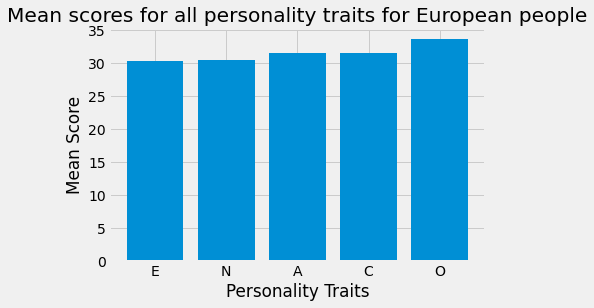

In [28]:
# Get the mean scores of the various personality traits for race == 3 (Europeans)
mean_europe_E = np.mean(europe_race['Total E Score'])
print(mean_europe_E)
mean_europe_N = np.mean(europe_race['Total N Score'])
print(mean_europe_N)
mean_europe_A = np.mean(europe_race['Total A Score'])
print(mean_europe_A)
mean_europe_C = np.mean(europe_race['Total C Score'])
print(mean_europe_C)
mean_europe_O = np.mean(europe_race['Total O Score'])
print(mean_europe_O)

# Try and create an average of personality scores compared with their specific race
x3 = ['E', 'N', 'A', 'C', 'O']
y3 = [mean_europe_E, mean_europe_N, mean_europe_A, mean_europe_C, mean_europe_O]

europe_score_plot = plt.bar(x3, y3)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for European people')
europe_score_plot

In [29]:
# Create a boolean which selects only one spefic race (in this case, Indians)
indian_peeps = total_scores['race'] == 4
indian_race = total_scores[indian_peeps]
indian_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
7,4,23,2,1,1,IN,35,19,31,30,30
47,4,19,1,1,1,IN,30,16,35,33,30
66,4,17,2,1,1,IN,39,44,44,34,36
152,4,23,2,1,1,IN,32,26,35,30,26
177,4,21,2,1,1,IN,33,31,33,30,33


31.645778364116094
32.58047493403694
33.65303430079155
31.449868073878626
32.27770448548813


<BarContainer object of 5 artists>

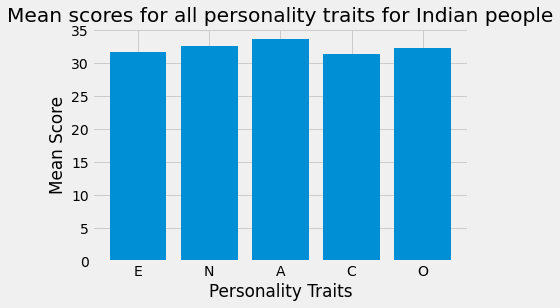

In [30]:
# Get the mean scores of the various personality traits for race == 4 (Indian)
mean_indian_E = np.mean(indian_race['Total E Score'])
print(mean_indian_E)
mean_indian_N = np.mean(indian_race['Total N Score'])
print(mean_indian_N)
mean_indian_A = np.mean(indian_race['Total A Score'])
print(mean_indian_A)
mean_indian_C = np.mean(indian_race['Total C Score'])
print(mean_indian_C)
mean_indian_O = np.mean(indian_race['Total O Score'])
print(mean_indian_O)

# Try and create an average of personality scores compared with their specific race
x4 = ['E', 'N', 'A', 'C', 'O']
y4 = [mean_indian_E, mean_indian_N, mean_indian_A, mean_indian_C, mean_indian_O]

indian_score_plot = plt.bar(x4, y4)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Indian people')
indian_score_plot

In [31]:
# Create a boolean which selects only one spefic race (in this case, Middle Easterns)
middle_east_peeps = total_scores['race'] == 5
me_race = total_scores[middle_east_peeps]
me_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
6,5,20,1,2,1,US,32,25,37,30,29
8,5,39,1,2,3,US,31,37,33,35,37
59,5,35,1,2,2,US,26,35,32,29,38
75,5,47,1,2,2,US,31,30,32,32,37
111,5,23,2,2,1,SA,32,31,25,26,32


30.794174757281553
31.576699029126214
32.58640776699029
31.36116504854369
32.262135922330096


<BarContainer object of 5 artists>

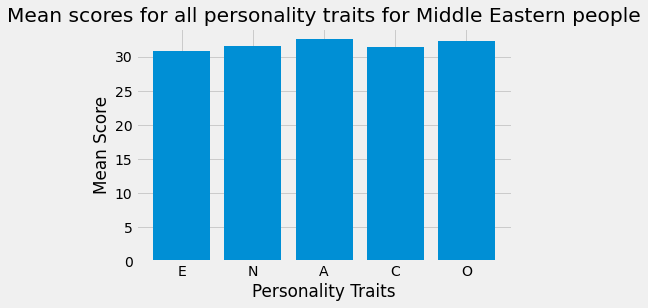

In [32]:
# Get the mean scores of the various personality traits for race == 5 (Middle Eastern)
mean_me_E = np.mean(me_race['Total E Score'])
print(mean_me_E)
mean_me_N = np.mean(me_race['Total N Score'])
print(mean_me_N)
mean_me_A = np.mean(me_race['Total A Score'])
print(mean_me_A)
mean_me_C = np.mean(me_race['Total C Score'])
print(mean_me_C)
mean_me_O = np.mean(me_race['Total O Score'])
print(mean_me_O)

# Try and create an average of personality scores compared with their specific race
x5 = ['E', 'N', 'A', 'C', 'O']
y5 = [mean_me_E, mean_me_N, mean_me_A, mean_me_C, mean_me_O]

me_score_plot = plt.bar(x5, y5)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Middle Eastern people')
me_score_plot

In [33]:
# Create a boolean which selects only one spefic race (in this case, North African)
north_african_peeps = total_scores['race'] == 6
na_race = total_scores[north_african_peeps]
na_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
42,6,17,1,2,1,US,29,33,31,31,34
49,6,24,2,1,1,MX,28,39,33,34,39
104,6,16,2,2,2,BR,25,26,32,35,31
114,6,20,1,2,1,US,30,32,31,30,28
123,6,41,1,2,2,US,30,33,31,32,34


30.68513853904282
31.143576826196472
31.926952141057935
31.692695214105793
33.27959697732997


<BarContainer object of 5 artists>

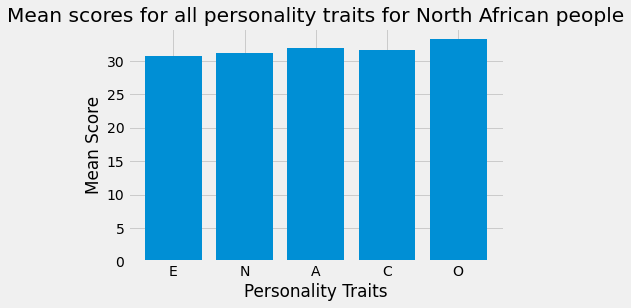

In [34]:
# Get the mean scores of the various personality traits for race == 6 (North African)
mean_na_E = np.mean(na_race['Total E Score'])
print(mean_na_E)
mean_na_N = np.mean(na_race['Total N Score'])
print(mean_na_N)
mean_na_A = np.mean(na_race['Total A Score'])
print(mean_na_A)
mean_na_C = np.mean(na_race['Total C Score'])
print(mean_na_C)
mean_na_O = np.mean(na_race['Total O Score'])
print(mean_na_O)

# Try and create an average of personality scores compared with their specific race
x6 = ['E', 'N', 'A', 'C', 'O']
y6 = [mean_na_E, mean_na_N, mean_na_A, mean_na_C, mean_na_O]

na_score_plot = plt.bar(x6, y6)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for North African people')
na_score_plot

In [35]:
# Create a boolean which selects only one specific race (in this case, Indigenous Australians)
indigenous_aussies_peeps = total_scores['race'] == 7
ia_race = total_scores[indigenous_aussies_peeps]
ia_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
207,7,20,0,1,1,ID,35,29,35,33,32
260,7,20,1,2,1,MU,36,28,38,33,31
1511,7,20,2,1,1,ID,38,41,40,35,32
2023,7,16,1,2,1,AU,27,30,32,21,34
2125,7,16,1,3,3,US,29,36,31,28,35


30.958333333333332
30.125
31.916666666666668
29.583333333333332
33.083333333333336


<BarContainer object of 5 artists>

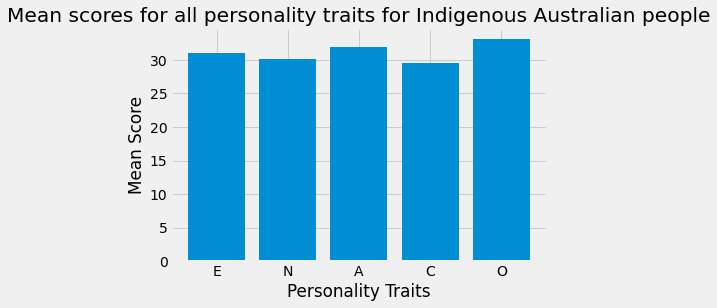

In [36]:
# Get the mean scores of the various personality traits for race == 7 (Indigenous Australians)
mean_ia_E = np.mean(ia_race['Total E Score'])
print(mean_ia_E)
mean_ia_N = np.mean(ia_race['Total N Score'])
print(mean_ia_N)
mean_ia_A = np.mean(ia_race['Total A Score'])
print(mean_ia_A)
mean_ia_C = np.mean(ia_race['Total C Score'])
print(mean_ia_C)
mean_ia_O = np.mean(ia_race['Total O Score'])
print(mean_ia_O)

# Try and create an average of personality scores compared with their specific race
x7 = ['E', 'N', 'A', 'C', 'O']
y7 = [mean_ia_E, mean_ia_N, mean_ia_A, mean_ia_C, mean_ia_O]

ia_score_plot = plt.bar(x7, y7)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Indigenous Australian people')
ia_score_plot

In [37]:
# Create a boolean which selects only one spefic race (in this case, Native Americans)
indigenous_americans_peeps = total_scores['race'] == 8
i_american_race = total_scores[indigenous_americans_peeps]
i_american_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
41,8,17,1,2,1,US,35,41,33,34,25
278,8,13,1,1,1,US,34,15,29,32,36
280,8,13,1,1,1,US,31,16,26,28,25
344,8,17,1,1,1,US,31,23,34,26,29
506,8,29,1,1,1,US,29,24,29,30,30


31.18905472636816
30.09452736318408
32.049751243781095
31.54228855721393
32.38805970149254


<BarContainer object of 5 artists>

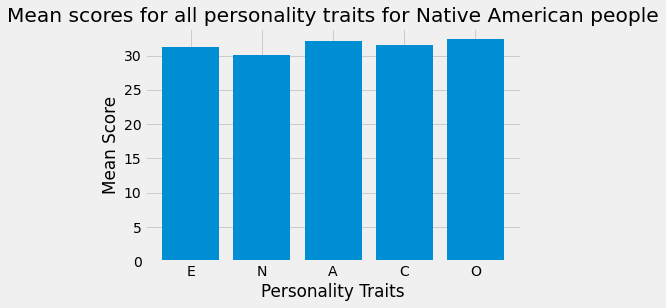

In [38]:
# Get the mean scores of the various personality traits for race == 8 (Native American)
mean_i_american_E = np.mean(i_american_race['Total E Score'])
print(mean_i_american_E)
mean_i_american_N = np.mean(i_american_race['Total N Score'])
print(mean_i_american_N)
mean_i_american_A = np.mean(i_american_race['Total A Score'])
print(mean_i_american_A)
mean_i_american_C = np.mean(i_american_race['Total C Score'])
print(mean_i_american_C)
mean_i_american_O = np.mean(i_american_race['Total O Score'])
print(mean_i_american_O)

# Try and create an average of personality scores compared with their specific race
x8 = ['E', 'N', 'A', 'C', 'O']
y8 = [mean_i_american_E, mean_i_american_N, mean_i_american_A, mean_i_american_C, mean_i_american_O]

i_american_score_plot = plt.bar(x8, y8)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Native American people')
i_american_score_plot

In [39]:
# Create a boolean which selects only one spefic race (in this case, North East Asians)
NE_asian_peeps = total_scores['race'] == 9
NE_asian_race = total_scores[NE_asian_peeps]
NE_asian_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
149,9,44,2,2,1,JP,29,28,30,27,29
160,9,23,2,2,1,PH,26,29,30,35,36
238,9,18,2,2,1,BT,32,39,29,34,37
286,9,13,1,2,1,US,29,18,28,27,28
332,9,17,1,2,1,US,35,48,37,38,32


31.06382978723404
32.148936170212764
32.340425531914896
31.617021276595743
32.63297872340426


<BarContainer object of 5 artists>

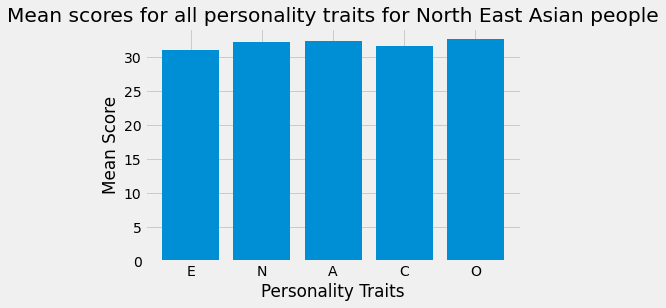

In [40]:
# Get the mean scores of the various personality traits for race == 9 (North East Asian)
mean_NE_asian_E = np.mean(NE_asian_race['Total E Score'])
print(mean_NE_asian_E)
mean_NE_asian_N = np.mean(NE_asian_race['Total N Score'])
print(mean_NE_asian_N)
mean_NE_asian_A = np.mean(NE_asian_race['Total A Score'])
print(mean_NE_asian_A)
mean_NE_asian_C = np.mean(NE_asian_race['Total C Score'])
print(mean_NE_asian_C)
mean_NE_asian_O = np.mean(NE_asian_race['Total O Score'])
print(mean_NE_asian_O)

# Try and create an average of personality scores compared with their specific race
x9 = ['E', 'N', 'A', 'C', 'O']
y9 = [mean_NE_asian_E, mean_NE_asian_N, mean_NE_asian_A, mean_NE_asian_C, mean_NE_asian_O]

NE_asian_score_plot = plt.bar(x9, y9)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for North East Asian people')
NE_asian_score_plot

In [41]:
# Create a boolean which selects only one spefic race (in this case, Pacific)
pacific_peeps = total_scores['race'] == 10
pacific_race = total_scores[pacific_peeps]
pacific_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
202,10,14,1,1,2,AU,35,40,41,32,33
284,10,13,2,1,1,US,28,26,30,30,37
656,10,18,2,2,2,PH,32,29,30,29,33
1191,10,50,1,2,1,NZ,31,27,25,38,36
1240,10,19,2,2,1,PW,32,31,34,32,34


30.83076923076923
29.446153846153845
31.692307692307693
30.723076923076924
32.36923076923077


<BarContainer object of 5 artists>

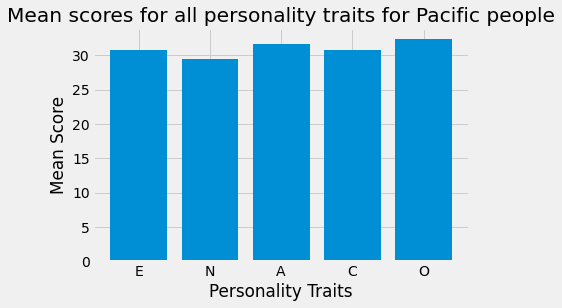

In [42]:
# Get the mean scores of the various personality traits for race == 10 (Pacific)
mean_pacific_E = np.mean(pacific_race['Total E Score'])
print(mean_pacific_E)
mean_pacific_N = np.mean(pacific_race['Total N Score'])
print(mean_pacific_N)
mean_pacific_A = np.mean(pacific_race['Total A Score'])
print(mean_pacific_A)
mean_pacific_C = np.mean(pacific_race['Total C Score'])
print(mean_pacific_C)
mean_pacific_O = np.mean(pacific_race['Total O Score'])
print(mean_pacific_O)

# Try and create an average of personality scores compared with their specific race
x10 = ['E', 'N', 'A', 'C', 'O']
y10 = [mean_pacific_E, mean_pacific_N, mean_pacific_A, mean_pacific_C, mean_pacific_O]

pacific_score_plot = plt.bar(x10, y10)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Pacific people')
pacific_score_plot

In [43]:
# Create a boolean which selects only one spefic race (in this case, South East Asians)
SE_asian_peeps = total_scores['race'] == 11
SE_asian_race = total_scores[SE_asian_peeps]
SE_asian_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
4,11,25,2,2,1,US,26,32,40,26,22
21,11,29,2,2,1,US,28,18,26,31,33
67,11,45,2,1,1,US,35,23,34,33,33
70,11,23,1,2,1,US,29,24,32,29,29
122,11,27,2,2,1,NZ,30,37,33,31,30


31.30091348737238
32.31918323481999
32.768941429339066
31.898441698011823
32.27673293927996


<BarContainer object of 5 artists>

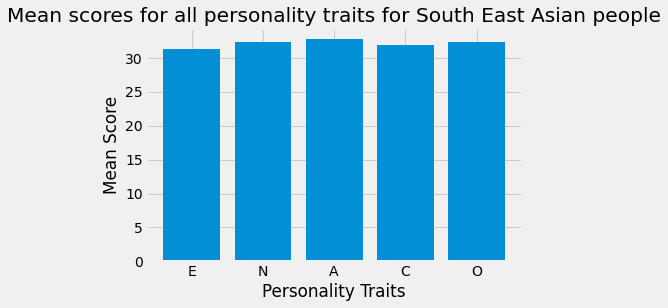

In [44]:
# Get the mean scores of the various personality traits for race == 11 (South East Asian)
mean_SE_asian_E = np.mean(SE_asian_race['Total E Score'])
print(mean_SE_asian_E)
mean_SE_asian_N = np.mean(SE_asian_race['Total N Score'])
print(mean_SE_asian_N)
mean_SE_asian_A = np.mean(SE_asian_race['Total A Score'])
print(mean_SE_asian_A)
mean_SE_asian_C = np.mean(SE_asian_race['Total C Score'])
print(mean_SE_asian_C)
mean_SE_asian_O = np.mean(SE_asian_race['Total O Score'])
print(mean_SE_asian_O)

# Try and create an average of personality scores compared with their specific race
x11 = ['E', 'N', 'A', 'C', 'O']
y11 = [mean_SE_asian_E, mean_SE_asian_N, mean_SE_asian_A, mean_SE_asian_C, mean_SE_asian_O]

W_african_score_plot = plt.bar(x11, y11)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for South East Asian people')
W_african_score_plot

In [45]:
# Create a boolean which selects only one spefic race (in this case, West Africans)
W_african_peeps = total_scores['race'] == 12
W_african_race = total_scores[W_african_peeps]
W_african_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
254,12,26,1,2,1,GH,31,29,29,34,30
322,12,17,1,2,1,US,36,33,29,26,30
365,12,25,2,2,1,NaN,31,35,31,31,31
375,12,29,2,2,1,US,34,33,28,32,34
538,12,20,1,2,1,GB,31,43,39,39,34


31.857142857142858
29.08108108108108
32.567567567567565
31.057915057915057
33.19305019305019


<BarContainer object of 5 artists>

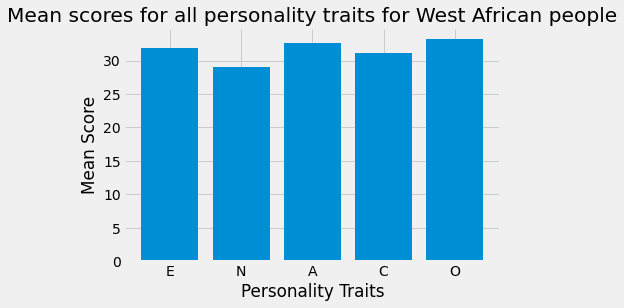

In [46]:
# Get the mean scores of the various personality traits for race == 12 (West African)
mean_W_african_E = np.mean(W_african_race['Total E Score'])
print(mean_W_african_E)
mean_W_african_N = np.mean(W_african_race['Total N Score'])
print(mean_W_african_N)
mean_W_african_A = np.mean(W_african_race['Total A Score'])
print(mean_W_african_A)
mean_W_african_C = np.mean(W_african_race['Total C Score'])
print(mean_W_african_C)
mean_W_african_O = np.mean(W_african_race['Total O Score'])
print(mean_W_african_O)

# Try and create an average of personality scores compared with their specific race
x12 = ['E', 'N', 'A', 'C', 'O']
y12 = [mean_W_african_E, mean_W_african_N, mean_W_african_A, mean_W_african_C, mean_W_african_O]

W_african_score_plot = plt.bar(x12, y12)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for West African people')
W_african_score_plot

In [47]:
# Create a boolean which selects only one spefic race (in this case, Other)
other_peeps = total_scores['race'] == 13
other_race = total_scores[other_peeps]
other_race.head()

,race,age,engnat,gender,hand,country,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
1,13,46,1,2,1,US,28,29,31,28,26
5,13,31,1,2,1,US,28,32,34,37,35
11,13,15,2,1,1,IN,32,28,37,34,34
12,13,22,1,2,1,US,30,29,32,33,31
16,13,19,1,2,1,FR,28,23,25,32,35


31.198667711598745
31.185344827586206
32.552115987460816
31.579937304075234
32.31974921630094


<BarContainer object of 5 artists>

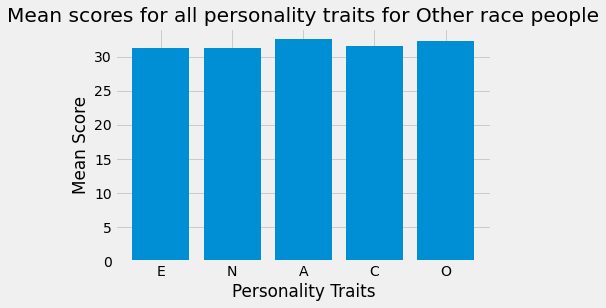

In [48]:
# Get the mean scores of the various personality traits for race == 13 (Other)
mean_other_E = np.mean(other_race['Total E Score'])
print(mean_other_E)
mean_other_N = np.mean(other_race['Total N Score'])
print(mean_other_N)
mean_other_A = np.mean(other_race['Total A Score'])
print(mean_other_A)
mean_other_C = np.mean(other_race['Total C Score'])
print(mean_other_C)
mean_other_O = np.mean(other_race['Total O Score'])
print(mean_other_O)

# Try and create an average of personality scores compared with their specific race
x13 = ['E', 'N', 'A', 'C', 'O']
y13 = [mean_other_E, mean_other_N, mean_other_A, mean_other_C, mean_other_O]

other_score_plot = plt.bar(x13, y13)
plt.xlabel('Personality Traits')
plt.ylabel('Mean Score')
plt.title('Mean scores for all personality traits for Other race people')
other_score_plot

Here, we aimed to create five bar plots comparing the average E, N, A, C, and O score between different races to see if there are any significant differences in the data. In the following graphs, the different races have been shortened in order to interpret the graph easier: MR is mixed race; A is Arctic; E is European; I is Indian; ME is Middle Eastern; NA is North African; IA is indigenous Australians; Am is native Americans; NEA is North-East Asian; P is Pacific; SE is South-East Asian; WA is West African; and O is Other.

<BarContainer object of 13 artists>

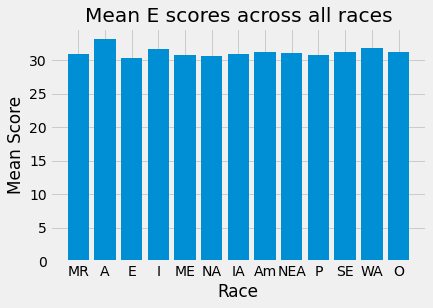

In [49]:
# Make a bar plot that shows the difference in Extraversion (E) scores when compared with the various races
x = ['MR', 'A', 'E', 'I', 'ME', 'NA', 'IA', 'Am', 'NEA', 'P', 'SE', 'WA', 'O']
y = [mean_mr_E, mean_arctic_E, mean_europe_E, mean_indian_E, mean_me_E, mean_na_E, mean_ia_E, mean_i_american_E,
    mean_NE_asian_E, mean_pacific_E, mean_SE_asian_E, mean_W_african_E, mean_other_E]

E_score_plot = plt.bar(x, y)
plt.xlabel('Race')
plt.ylabel('Mean Score')
plt.title('Mean E scores across all races')
E_score_plot

<BarContainer object of 13 artists>

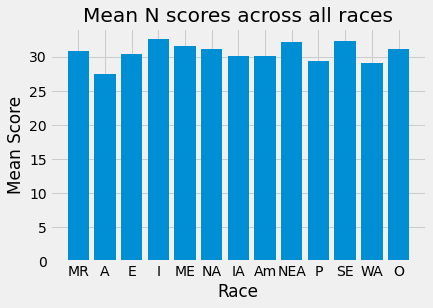

In [50]:
# Make a bar plot that shows the difference in Emotional Stability (N) scores when compared with the various races
a = ['MR', 'A', 'E', 'I', 'ME', 'NA', 'IA', 'Am', 'NEA', 'P', 'SE', 'WA', 'O']
b = [mean_mr_N, mean_arctic_N, mean_europe_N, mean_indian_N, mean_me_N, mean_na_N, mean_ia_N, mean_i_american_N,
    mean_NE_asian_N, mean_pacific_N, mean_SE_asian_N, mean_W_african_N, mean_other_N]

N_score_plot = plt.bar(a, b)
plt.xlabel('Race')
plt.ylabel('Mean Score')
plt.title('Mean N scores across all races')
N_score_plot

In the plot above, Mean N scores across all races, it was discovered that the Arctic Race had a lower average N score when compared with the average N score of other races. To see if this point is significant or not, a permutation test was carried out. 

Text(0.5, 1.0, 'Distribution of Arctic Individuals N Score')

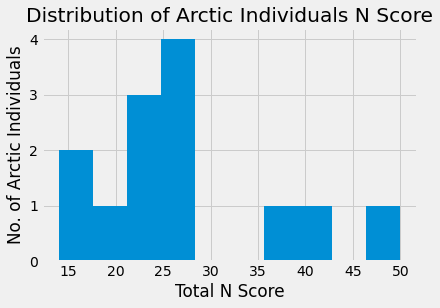

In [51]:
# Get the number of Arctic people and then the rest of the dataframe, specifically their Total N Score
number_of_Arctic = personality[personality['race'] == 2]['Total N Score']
number_of_everyone_else = personality[(personality['race'] != 2)]['Total N Score']

# Create a histogram of the distribution of N score for Arctic individuals
number_of_Arctic.hist()
len(number_of_Arctic)
plt.xlabel('Total N Score')
plt.ylabel('No. of Arctic Individuals')
plt.title('Distribution of Arctic Individuals N Score')

Text(0.5, 1.0, 'Distribution of Everyone other than Arctic Individuals N Score')

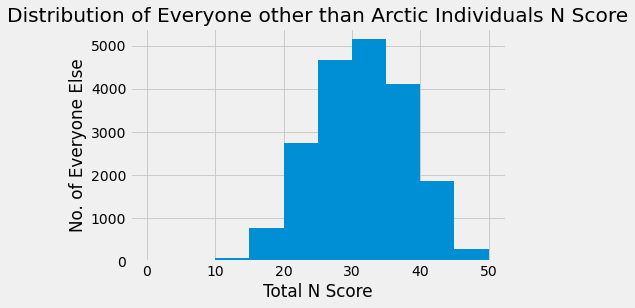

In [52]:
# Now do the same but for everyone else
number_of_everyone_else.hist()
len(number_of_everyone_else)
plt.xlabel('Total N Score')
plt.ylabel('No. of Everyone Else')
plt.title('Distribution of Everyone other than Arctic Individuals N Score')

In [53]:
# Calculate the mean difference between both the Arctic's N score and everyone else's mean N score
diff_arctic_N = mean_arctic_N - np.mean(number_of_everyone_else)
diff_arctic_N

-3.492513122539524

In [54]:
# Pool everyone together
pool_Arctic_N = np.append(number_of_Arctic, number_of_everyone_else)
len(pool_Arctic_N)

19709

In [55]:
# Then we shuffle the total N scores
shuffle_Arctic_N = np.random.permutation(pool_Arctic_N)
shuffle_Arctic_N

array([26, 28, 41, ..., 24, 37, 39], dtype=int64)

In [56]:
# We would like the total number of Arctic people
n_arctic = len(number_of_Arctic)
n_arctic

13

In [57]:
# The first 13 values will be our fake Arctic individuals
fake_arctic = shuffle_Arctic_N[:n_arctic]
# The rest will be fake everyone else
fake_everyone = shuffle_Arctic_N[n_arctic:]

In [58]:
# Now we shall calculate the mean difference of our new, fake data
fake_diff_arctic = np.mean(fake_arctic) - np.mean(fake_everyone)
fake_diff_arctic

-2.876722333312504

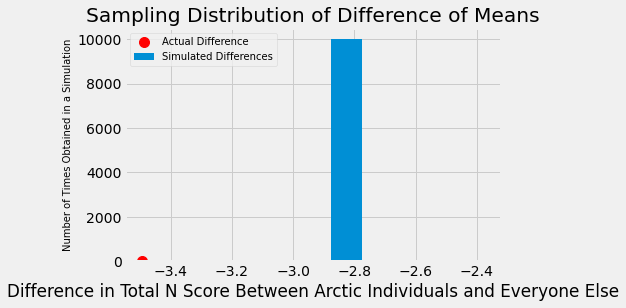

In [59]:
# The following code creates a for loop where it can shuffle the pooled array 10,000 times
arctic_diff = np.zeros(10000)
for i in np.arange(10000):
    # Shuffle the data
    shuffle = np.random.permutation(pool_Arctic_N)
    # Split the data into two new fake groups
    fake_arctic = shuffle_Arctic_N[:n_arctic]
    fake_everyone = shuffle_Arctic_N[n_arctic:]
    # Recalculate the mean difference
    diff_arctic = np.mean(fake_arctic) - np.mean(fake_everyone)
    # Store the mean difference
    arctic_diff[i] = diff_arctic

# Plot the histogram and add the actual difference to it in red
plt.hist(arctic_diff, label = 'Simulated Differences')
fontsize = {'fontsize': 10}
plt.plot(diff_arctic_N, 20, 'o', markersize = 10, color = 'red', label = 'Actual Difference')
plt.xlabel('Difference in Total N Score Between Arctic Individuals and Everyone Else')
plt.ylabel('Number of Times Obtained in a Simulation', **fontsize)
plt.title('Sampling Distribution of Difference of Means')
plt.legend(**fontsize)

In [60]:
# Proportion of sampling distribution compared to the observed values. This was done to estimate the probability
permutation_arctic_N = np.count_nonzero(arctic_diff >= diff_arctic_N) / 10000
permutation_arctic_N

1.0

In [61]:
# The standard deviation was then calculated to measure the spread about the mean
sd_arctic_N = np.std(arctic_diff)
sd_arctic_N

4.440892098500626e-16

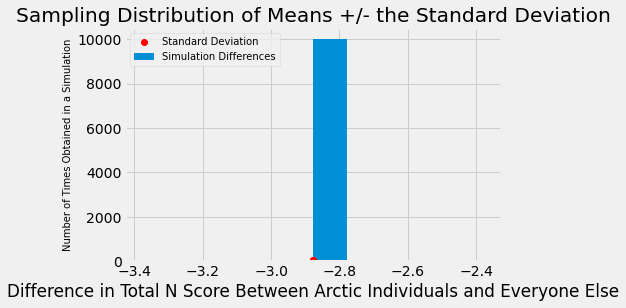

In [62]:
# Now plot the shuffled data again but this time with standard deviation
plt.hist(arctic_diff, label = 'Simulation Differences')
fontsize = {'fontsize': 10}
fake_mean = np.mean(arctic_diff)
plt.plot([fake_mean - sd_arctic_N, fake_mean + sd_arctic_N], [50, 50], 'or', label = 'Standard Deviation')
plt.title('Sampling Distribution of Means +/- the Standard Deviation')
plt.xlabel('Difference in Total N Score Between Arctic Individuals and Everyone Else')
plt.ylabel('Number of Times Obtained in a Simulation', **fontsize)
plt.legend(**fontsize)

In [63]:
# Now we do something similar to the t-test
like_t_arctic_N = diff_arctic_N / sd_arctic_N
like_t_arctic_N

-7864440398627784.0

In [64]:
# Let's do the actual t-test now
arctic_errors = number_of_Arctic - np.mean(number_of_Arctic)
everyone_errors = number_of_everyone_else - np.mean(number_of_everyone_else)
all_errors = np.append(arctic_errors, everyone_errors)

n1 = len(number_of_Arctic)
n2 = len(number_of_everyone_else)
est_error_sd = np.sqrt(np.sum(all_errors ** 2) / (n1 + n2 -2))
sampling_sd_estimate = est_error_sd * np.sqrt(1 / n1 + 1 / n2)
sampling_sd_estimate

1.8631607655738354

In [65]:
# Now calculate the t statistic
t_statistic_arctic_N = diff_arctic_N / sampling_sd_estimate
t_statistic_arctic_N

-1.8745098045599216

Arctic people may be emotion unstable for a variety of reasons (Freeman, 2000):

Over the years, they have started to spend less time hunting and more time in their settlements which has resulted in a lower quality of food and decline in their health. Furthermore, the loss of their hunting lifestyle has led to feelings of purposelessness, often resulting in alcohol abuse. Climate change has caused changes in winter wind patterns which affects snow cover over vegetation often resulting in the death of livestock (sheep). Furthermore, the increase in contamination of chemical pollutants such as mercury and cadmium in their food sources (seals, whales and fish) causes them stress.

<BarContainer object of 13 artists>

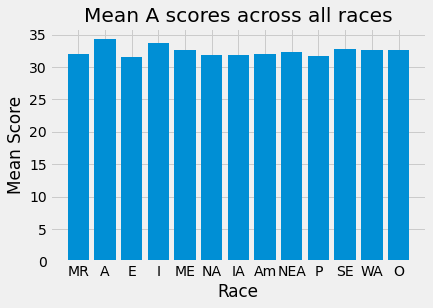

In [66]:
# Make a bar plot that shows the difference in Agreeableness (A) scores when compared with the various races
c = ['MR', 'A', 'E', 'I', 'ME', 'NA', 'IA', 'Am', 'NEA', 'P', 'SE', 'WA', 'O']
d = [mean_mr_A, mean_arctic_A, mean_europe_A, mean_indian_A, mean_me_A, mean_na_A, mean_ia_A, mean_i_american_A,
    mean_NE_asian_A, mean_pacific_A, mean_SE_asian_A, mean_W_african_A, mean_other_A]

A_score_plot = plt.bar(c, d)
plt.xlabel('Race')
plt.ylabel('Mean Score')
plt.title('Mean A scores across all races')
A_score_plot

<BarContainer object of 13 artists>

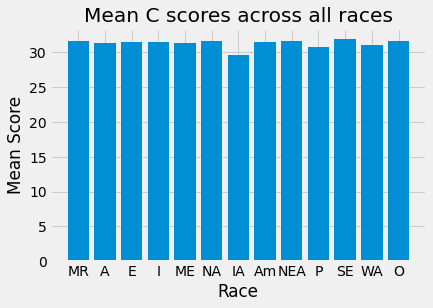

In [67]:
# Make a bar plot that shows the difference in Conscientiousness (C) scores when compared with the various races
e = ['MR', 'A', 'E', 'I', 'ME', 'NA', 'IA', 'Am', 'NEA', 'P', 'SE', 'WA', 'O']
f = [mean_mr_C, mean_arctic_C, mean_europe_C, mean_indian_C, mean_me_C, mean_na_C, mean_ia_C, mean_i_american_C,
    mean_NE_asian_C, mean_pacific_C, mean_SE_asian_C, mean_W_african_C, mean_other_C]

C_score_plot = plt.bar(e, f)
plt.xlabel('Race')
plt.ylabel('Mean Score')
plt.title('Mean C scores across all races')
C_score_plot

The above bar chart shows a slight decrease in the mean C score for Indigenous Australias. To see if there is anything of significance, another permutation test will be carried out.

Text(0.5, 1.0, 'Distribution of Indigenous Australians C Score')

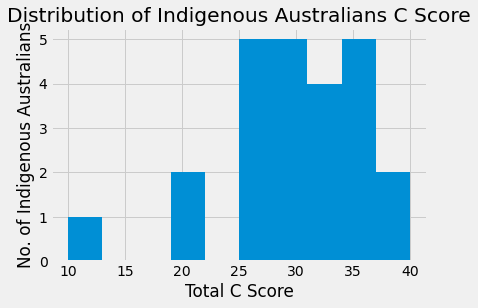

In [68]:
# Again, we obtain the number of Indigenous Australian individuals and their C score from the data frame and compare it 
# with the rest of the data frame to see if there is any significance
no_of_IA = personality[personality['race'] == 7]['Total C Score']
everyone_else = personality[personality['race'] != 7]['Total C Score']

# Plot a histogram of the spread of C scores for Indigenous Australians
no_of_IA.hist()
len(no_of_IA)
plt.xlabel('Total C Score')
plt.ylabel('No. of Indigenous Australians')
plt.title('Distribution of Indigenous Australians C Score')

Text(0.5, 1.0, 'Distribution of Indigenous Australians C Score')

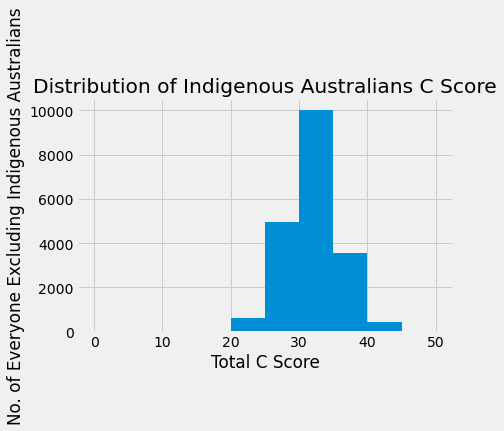

In [128]:
# Now do the same for everyone else
everyone_else.hist()
len(everyone_else)
plt.xlabel('Total C Score')
plt.ylabel('No. of Everyone Excluding Indigenous Australians')
plt.title('Distribution of Indigenous Australians C Score')

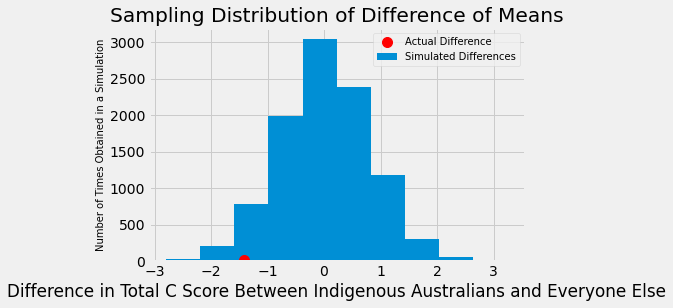

In [130]:
# Calculate the mean difference between the Indigenous Australians C score from everyone else's
diff_ia_C = mean_ia_N - np.mean(everyone_else)

# Now pool everyone
pool_ia_C = np.append(no_of_IA, everyone_else)
len(pool_ia_C)

# Find the number of Indigenous Australians
n_ia = len(no_of_IA)

# Now we create our for loop
ia_diff = np.zeros(10000)
for i in np.arange(10000):
    shuffle_ia_C = np.random.permutation(pool_ia_C)
    # Split the data into two new fake groups
    fake_ia = shuffle_ia_C[:n_ia]
    fake_everyone_else = shuffle_ia_C[n_ia:]
    # Recalculate the mean difference
    diff_ia = np.mean(fake_ia) - np.mean(fake_everyone_else)
    # Now store the difference
    ia_diff[i] = diff_ia
    
# Now plot the histogram and add the actual difference in red
plt.hist(ia_diff, label = 'Simulated Differences')
fontsize = {'fontsize': 10}
plt.plot(diff_ia_C, 20, 'o', markersize = 10, color = 'red', label = 'Actual Difference')
plt.xlabel('Difference in Total C Score Between Indigenous Australians and Everyone Else')
plt.ylabel('Number of Times Obtained in a Simulation', **fontsize)
plt.title('Sampling Distribution of Difference of Means')
plt.legend(**fontsize)

In [132]:
# Now compare the sampling distibution to the observed value and calculate the proportion
permutation_ia_C = np.count_nonzero(ia_diff >= diff_ia_C) / 10000
permutation_ia_C

0.9656

In [133]:
# The standard deviation was then calculated
sd_ia_C = np.std(ia_diff)
sd_ia_C

0.7947930750732114

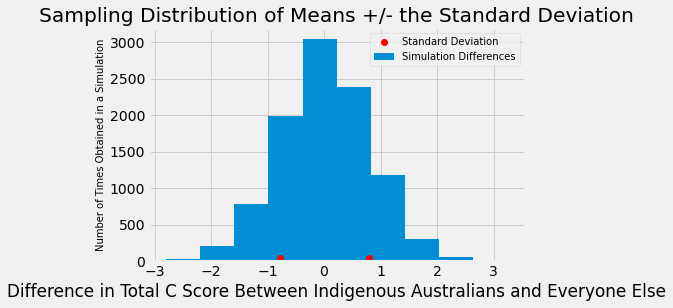

In [134]:
# Now plot the shuffled data again but this time with standard deviation
plt.hist(ia_diff, label = 'Simulation Differences')
fontsize = {'fontsize': 10}
fake_mean_ia = np.mean(ia_diff)
plt.plot([fake_mean_ia - sd_ia_C, fake_mean_ia + sd_ia_C], [50, 50], 'or', label = 'Standard Deviation')
plt.title('Sampling Distribution of Means +/- the Standard Deviation')
plt.xlabel('Difference in Total C Score Between Indigenous Australians and Everyone Else')
plt.ylabel('Number of Times Obtained in a Simulation', **fontsize)
plt.legend(**fontsize)

In [137]:
# Time to do the t-test
ia_errors = no_of_IA - np.mean(no_of_IA)
everyone_else_errors = everyone_else - np.mean(everyone_else)
all_errors_ia = np.append(ia_errors, everyone_else_errors)

n1 = len(no_of_IA)
n2 = len(everyone_else)
est_error_sd = np.sqrt(np.sum(all_errors_ia ** 2) / (n1 + n2 -2))
sampling_sd_estimate = est_error_sd * np.sqrt(1 / n1 + 1 / n2)

# Calculate t statistic
t_statistic_ia = diff_ia_C / sampling_sd_estimate
t_statistic_ia

-1.7953551804582444

<BarContainer object of 13 artists>

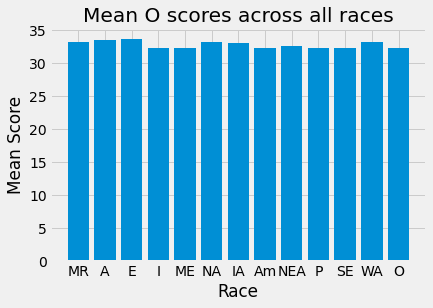

In [69]:
# Make a bar plot that shows the difference in Intellect/Imagination (O) scores when compared with the various races
g = ['MR', 'A', 'E', 'I', 'ME', 'NA', 'IA', 'Am', 'NEA', 'P', 'SE', 'WA', 'O']
h = [mean_mr_O, mean_arctic_O, mean_europe_O, mean_indian_O, mean_me_O, mean_na_O, mean_ia_O, mean_i_american_O,
    mean_NE_asian_O, mean_pacific_O, mean_SE_asian_O, mean_W_african_O, mean_other_O]

O_score_plot = plt.bar(g, h)
plt.xlabel('Race')
plt.ylabel('Mean Score')
plt.title('Mean O scores across all races')
O_score_plot

Now we should try to investigate the effect age has on the personality scores.

First, we'll group the age ranges as follows:
Under 18s, 18 - 21 years, 22 - 25 years, 26 - 30 years, 31 - 40 years, 41 - 50 years, 51 - 60 years, and older than 60s. We have decided to group them in these age ranges as we thought we would see the greatest personality changes in these ranges e.g. younger people can be influenced a lot easier and are still growing as a person, whereas a person in their middle ages will be pretty set on who they are and what they want.

In [70]:
# Create a boolean to get participants below 18
below_18 = total_scores['age'] < 18

# Just create a new data frame as it's easier to visualise the data
b18 = total_scores[below_18]

# Now take the mean
mean_b18 = np.mean(b18)
mean_b18

race              5.478863
age              15.739054
engnat            1.244590
gender            1.671364
hand              1.161550
Total E Score    30.690740
Total N Score    32.563412
Total A Score    31.755913
Total C Score    31.651485
Total O Score    33.094615
dtype: float64

In [71]:
# Create a boolean to get participants equal to or above 18, a boolean for particpants below 22, and then create a boolean 
# that combines these two booleans for people between the ages 18 - 21
above_18 = total_scores['age'] >= 18
below_22 = total_scores['age'] < 22
above_18_below_22 = np.logical_and(above_18, below_22)
above_18_below_22

# Just create a new data frame as it's easier to visualise the data
a18_b22 = total_scores[above_18_below_22]
a18_b22.head()

# Now take the mean
mean_a18_b22 = np.mean(a18_b22)
mean_a18_b22

race              5.519977
age              19.409673
engnat            1.388645
gender            1.637354
hand              1.127318
Total E Score    30.847066
Total N Score    31.545785
Total A Score    32.136876
Total C Score    31.640413
Total O Score    32.743835
dtype: float64

In [72]:
# Create a boolean to get participants equal to or above 22, a boolean for particpants below 26, and then create a boolean 
# that combines these two booleans for people between the ages 22 - 25
above_22 = total_scores['age'] >= 22
below_26 = total_scores['age'] < 26
above_22_below_26 = np.logical_and(above_22, below_26)
above_22_below_26

# Just create a new data frame as it's easier to visualise the data
a22_b26 = total_scores[above_22_below_26]
a22_b26.head()

# Now take the mean
mean_a22_b26 = np.mean(a22_b26)
mean_a22_b26

race              5.633730
age              23.344007
engnat            1.512656
gender            1.572126
hand              1.114669
Total E Score    30.980787
Total N Score    31.223239
Total A Score    32.378774
Total C Score    31.504422
Total O Score    32.964928
dtype: float64

In [73]:
# Create a boolean to get participants equal to or above 26, a boolean for particpants below 31, and then create a boolean 
# that combines these two booleans for people between the ages 26 - 30
above_26 = total_scores['age'] >= 26
below_31 = total_scores['age'] < 31
above_26_below_31 = np.logical_and(above_26, below_31)
above_26_below_31

# Just create a new data frame as it's easier to visualise the data
a26_b31 = total_scores[above_26_below_31]
a26_b31.head()

# Now take the mean
mean_a26_b31 = np.mean(a26_b31)
mean_a26_b31

race              5.387039
age              27.802430
engnat            1.491449
gender            1.571557
hand              1.106661
Total E Score    30.868137
Total N Score    30.572457
Total A Score    32.216022
Total C Score    31.706121
Total O Score    33.176868
dtype: float64

In [74]:
# Create a boolean to get participants equal to or above 31, a boolean for particpants below 41, and then create a boolean 
# that combines these two booleans for people between the ages 31 - 40
above_31 = total_scores['age'] >= 31
below_41 = total_scores['age'] < 41
above_31_below_41 = np.logical_and(above_31, below_41)
above_31_below_41

# Just create a new data frame as it's easier to visualise the data
a31_b41 = total_scores[above_31_below_41]
a31_b41.head()

# Now take the mean
mean_a31_b41 = np.mean(a31_b41)
mean_a31_b41

race              5.013842
age              34.907718
engnat            1.378775
gender            1.586409
hand              1.121644
Total E Score    30.580117
Total N Score    29.823406
Total A Score    32.026426
Total C Score    31.519295
Total O Score    33.480285
dtype: float64

In [75]:
# Create a boolean to get participants equal to or above 41, a boolean for particpants below 51, and then create a boolean 
# that combines these two booleans for people between the ages 41 - 50
above_41 = total_scores['age'] >= 41
below_51 = total_scores['age'] < 51
above_41_below_51 = np.logical_and(above_41, below_51)
above_41_below_51

# Just create a new data frame as it's easier to visualise the data
a41_b51 = total_scores[above_41_below_51]
a41_b51.head()

# Now take the mean
mean_a41_b51 = np.mean(a41_b51)
mean_a41_b51

race              4.719682
age              45.184891
engnat            1.246521
gender            1.614314
hand              1.129225
Total E Score    30.600398
Total N Score    28.675944
Total A Score    31.793241
Total C Score    31.239231
Total O Score    33.831014
dtype: float64

In [76]:
# Create a boolean to get participants equal to or above 51, a boolean for particpants below 61, and then create a boolean 
# that combines these two booleans for people between the ages 51 - 61
above_51 = total_scores['age'] >= 51
below_61 = total_scores['age'] < 61
above_51_below_61 = np.logical_and(above_51, below_61)
above_51_below_61

# Just create a new data frame as it's easier to visualise the data
a51_b61 = total_scores[above_51_below_61]
a51_b61.head()

# Now take the mean
mean_a51_b61 = np.mean(a51_b61)
mean_a51_b61

race              4.426859
age              54.866906
engnat            1.140288
gender            1.615108
hand              1.130695
Total E Score    30.372902
Total N Score    27.754197
Total A Score    31.767386
Total C Score    31.032374
Total O Score    33.842926
dtype: float64

In [77]:
# The oldest person ever recorded was 116 years old; therefore, we have not included anyone claiming to be older

above_61 = total_scores['age'] >= 61
below_117 = total_scores['age'] < 117
above_61_below_117 = np.logical_and(above_61, below_117)

# Just create a new data frame as it's easier to visualise the data
a61_b117 = total_scores[above_61_below_117]
a61_b117

# Now take the mean
mean_a61_b117 = np.mean(a61_b117)
mean_a61_b117

race              3.963768
age              66.416667
engnat            1.090580
gender            1.619565
hand              1.163043
Total E Score    30.561594
Total N Score    28.166667
Total A Score    31.652174
Total C Score    30.989130
Total O Score    33.829710
dtype: float64

Text(0.5, 1.0, 'Mean E scores across all ages')

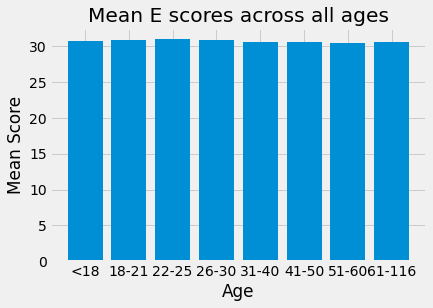

In [78]:
# Create a bar chart that shows the average total E score between the various age groups
age = ['<18','18-21', '22-25', '26-30', '31-40', '41-50', '51-60', '61-116']
E_Score = [mean_b18['Total E Score'],mean_a18_b22['Total E Score'], mean_a22_b26['Total E Score'], 
           mean_a26_b31['Total E Score'], mean_a31_b41['Total E Score'], mean_a41_b51['Total E Score'], 
           mean_a51_b61['Total E Score'], mean_a61_b117['Total E Score']]

age_E_score_plot = plt.bar(age, E_Score)
plt.xlabel('Age')
plt.ylabel('Mean Score')
plt.title('Mean E scores across all ages')

Text(0.5, 1.0, 'Mean N scores across all ages')

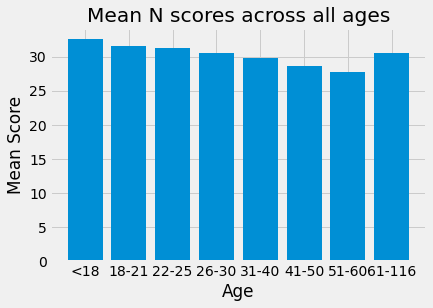

In [79]:
# Create a bar chart that shows the average total N score between the various age groups
N_Score = [mean_b18['Total N Score'], mean_a18_b22['Total N Score'], mean_a22_b26['Total N Score'], 
           mean_a26_b31['Total N Score'], mean_a31_b41['Total N Score'], mean_a41_b51['Total N Score'], 
           mean_a51_b61['Total N Score'], mean_a61_b117['Total E Score']]

age_N_score_plot = plt.bar(age, N_Score)
plt.xlabel('Age')
plt.ylabel('Mean Score')
plt.title('Mean N scores across all ages')

Text(0.5, 1.0, 'Mean A scores across all ages')

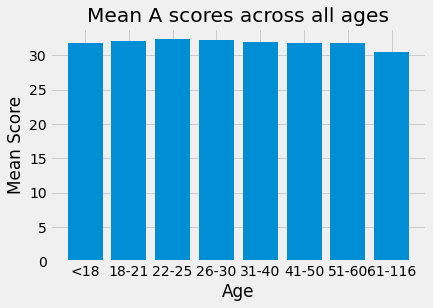

In [80]:
# Create a bar chart that shows the average total A score between the various age groups
A_Score = [mean_b18['Total A Score'], mean_a18_b22['Total A Score'], mean_a22_b26['Total A Score'], 
           mean_a26_b31['Total A Score'], mean_a31_b41['Total A Score'], mean_a41_b51['Total A Score'], 
           mean_a51_b61['Total A Score'], mean_a61_b117['Total E Score']]

age_A_score_plot = plt.bar(age, A_Score)
plt.xlabel('Age')
plt.ylabel('Mean Score')
plt.title('Mean A scores across all ages')

Text(0.5, 1.0, 'Mean C scores across all ages')

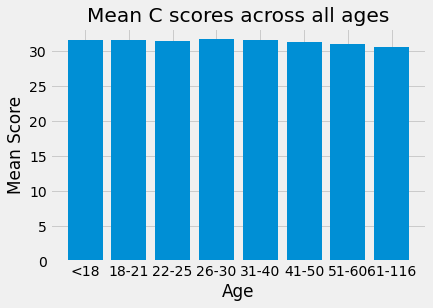

In [81]:
# Create a bar chart that shows the average total C score between the various age groups 
C_Score = [mean_b18['Total C Score'], mean_a18_b22['Total C Score'], mean_a22_b26['Total C Score'], 
           mean_a26_b31['Total C Score'], mean_a31_b41['Total C Score'], mean_a41_b51['Total C Score'], 
           mean_a51_b61['Total C Score'], mean_a61_b117['Total E Score']]

age_C_score_plot = plt.bar(age, C_Score)
plt.xlabel('Age')
plt.ylabel('Mean Score')
plt.title('Mean C scores across all ages')

Text(0.5, 1.0, 'Mean O scores across all ages')

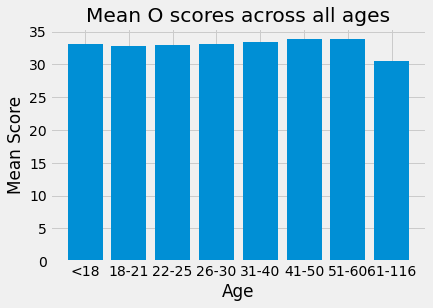

In [82]:
# Create a bar chart that shows the average total O score between the various age groups
O_Score = [mean_b18['Total O Score'], mean_a18_b22['Total O Score'], mean_a22_b26['Total O Score'], 
           mean_a26_b31['Total O Score'], mean_a31_b41['Total O Score'], mean_a41_b51['Total O Score'], 
           mean_a51_b61['Total O Score'], mean_a61_b117['Total E Score']]

age_O_score_plot = plt.bar(age, O_Score)
plt.xlabel('Age')
plt.ylabel('Mean Score')
plt.title('Mean O scores across all ages')

Text(0.5, 1.0, 'Distribution of Over 61s O Score')

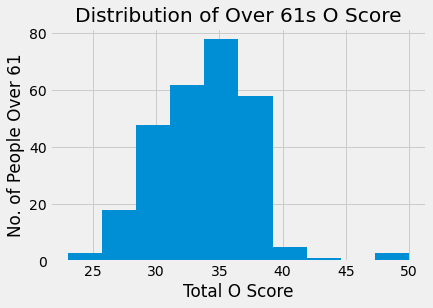

In [138]:
# Obtain number of over 60s and then everyone under that age range from the data frame
over_61s = personality[personality['age'] >= 61]['Total O Score']
under_60s = personality[personality['age'] <= 60]['Total O Score']

# Create a histogram of the over 60s
over_61s.hist()
len(over_61s)
plt.xlabel('Total O Score')
plt.ylabel('No. of People Over 61')
plt.title('Distribution of Over 61s O Score')

Text(0.5, 1.0, 'Distribution of Under 60s')

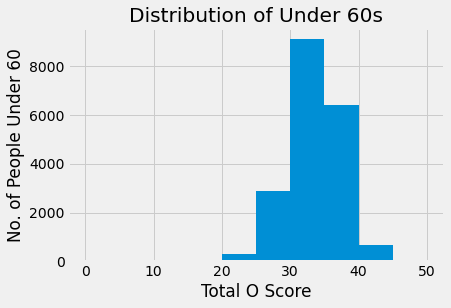

In [140]:
# Now do the same for the under 60s
under_60s.hist()
len(under_60s)
plt.xlabel('Total O Score')
plt.ylabel('No. of People Under 60')
plt.title('Distribution of Under 60s')

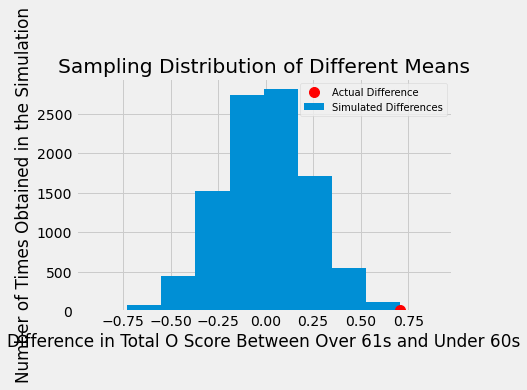

In [141]:
# Calculate mean difference between the under 60s and over 61s in their Total O Score
diff_in_mean_age = np.mean(over_61s) - np.mean(under_60s)

# Pool everyone together
pool_age = np.append(over_61s, under_60s)
len(pool_age)

# Find the number of individuals over the age of 61
n_61 = len(over_61s)

# Now for the for loop 
diff_age = np.zeros(10000)
for i in np.arange(10000):
    # Shuffle the data
    shuffle_age = np.random.permutation(pool_age)
    # Split the data into two new fake groups
    fake_over_61s = shuffle_age[:n_61]
    fake_under_60s = shuffle_age[n_61:]
    # Recalculate the mean difference
    age_diff = np.mean(fake_over_61s) - np.mean(fake_under_60s)
    # Store the mean difference
    diff_age[i] = age_diff
    
# Plot a histogram and add the actual difference to it in red
plt.hist(diff_age, label = 'Simulated Differences')
fontsize = {'fontsize': 10}
plt.plot(diff_in_mean_age, 20, 'o', markersize = 10, color = 'red', label = 'Actual Difference')
plt.xlabel('Difference in Total O Score Between Over 61s and Under 60s')
plt.ylabel('Number of Times Obtained in the Simulation')
plt.title('Sampling Distribution of Different Means')
plt.legend(**fontsize)

In [142]:
# Calculate the proportion of sampling distribution compared to the observed values
permutation_over_61s = np.count_nonzero(diff_age >= diff_in_mean_age) / 10000
permutation_over_61s

0.001

In [143]:
# The standard deviation was then calculated to measure the spread about the mean
sd_over_61s = np.std(diff_age)
sd_over_61s

0.23501801132801944

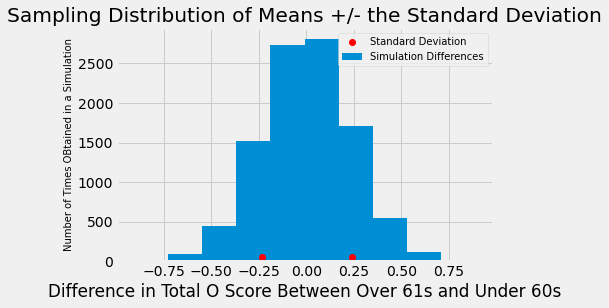

In [145]:
# Now plot the shuffled data again but this time with the standard deviation
plt.hist(diff_age, label = 'Simulation Differences')
fontsize = {'fontsize': 10}
fake_mean_age = np.mean(diff_age)
plt.plot([fake_mean_age - sd_over_61s, fake_mean_age + sd_over_61s], [50, 50], 'or', label = 'Standard Deviation')
plt.title('Sampling Distribution of Means +/- the Standard Deviation')
plt.xlabel('Difference in Total O Score Between Over 61s and Under 60s')
plt.ylabel('Number of Times OBtained in a Simulation', **fontsize)
plt.legend(**fontsize)

In [146]:
# Time to do the t-test
over_61s_errors = over_61s - np.mean(over_61s)
under_60s_errors = under_60s - np.mean(under_60s)
all_errors_age = np.append(over_61s_errors, under_60s_errors)

n1 = len(over_61s)
n2 = len(under_60s)
est_error_sd = np.sqrt(np.sum(all_errors_age ** 2) / (n1 + n2 -2))
sampling_sd_estimate = est_error_sd * np.sqrt(1 / n1 + 1 / n2)
sampling_sd_estimate

0.23300027617284258

In [147]:
# Now calculate the t statistic
t_statistic_age = diff_in_mean_age / sampling_sd_estimate
t_statistic_age

3.027402173223008

Research has shown that intellect declines in the elderly especially after the sixth decade (60+) and that the decrease is due to selective local atrophy of brain during the ageing process. This suggests that the elderly are self-aware of their intellect which is reflected in the results (LEE et al., 2005).

In [83]:
# Create a boolean which selects only one spefic gender (in this case, Male)
male = total_scores['gender'] == 1
male = total_scores[male]
male.head()

mean_male = np.mean(male)
mean_male

race              5.070095
age              26.708180
engnat            1.415176
gender            1.000000
hand              1.136244
Total E Score    31.104287
Total N Score    29.740926
Total A Score    31.777617
Total C Score    31.320226
Total O Score    33.471331
dtype: float64

In [84]:
male.corr()

,race,age,engnat,gender,hand,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
race,1.000000,-0.075301,0.199627,NaN,-0.034466,0.092495,0.047127,0.108914,0.048365,-0.090310
age,-0.075301,1.000000,-0.048879,NaN,-0.027458,-0.045310,-0.109099,-0.023343,-0.002687,0.032219
engnat,0.199627,-0.048879,1.000000,NaN,-0.098860,0.002943,0.105862,0.081896,0.029283,-0.116472
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hand,-0.034466,-0.027458,-0.098860,NaN,1.000000,0.011245,0.005681,-0.010123,0.030018,0.064168
Total E Score,0.092495,-0.045310,0.002943,NaN,0.011245,1.000000,0.029259,0.299959,0.211326,0.095671
Total N Score,0.047127,-0.109099,0.105862,NaN,0.005681,0.029259,1.000000,0.219300,0.184123,0.112674
Total A Score,0.108914,-0.023343,0.081896,NaN,-0.010123,0.299959,0.219300,1.000000,0.227020,0.160032
Total C Score,0.048365,-0.002687,0.029283,NaN,0.030018,0.211326,0.184123,0.227020,1.000000,0.287043
Total O Score,-0.090310,0.032219,-0.116472,NaN,0.064168,0.095671,0.112674,0.160032,0.287043,1.000000


In [85]:
# Create a boolean which selects only one spefic gender (in this case, Female)
female = total_scores['gender'] == 2
female = total_scores[female]
female.head()

mean_female = np.mean(female)
mean_female

race              5.492196
age              26.031300
engnat            1.333862
gender            2.000000
hand              1.124447
Total E Score    30.559553
Total N Score    31.710792
Total A Score    32.227443
Total C Score    31.685502
Total O Score    32.910859
dtype: float64

In [86]:
female.corr()

,race,age,engnat,gender,hand,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
race,1.000000,-0.093129,0.236725,NaN,-0.009134,0.083433,0.036665,0.088374,-0.010953,-0.136819
age,-0.093129,1.000000,-0.097747,NaN,0.003216,-0.024384,-0.244873,-0.011950,-0.062810,0.107209
engnat,0.236725,-0.097747,1.000000,NaN,-0.045326,0.024889,0.090114,0.079820,-0.012175,-0.072248
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hand,-0.009134,0.003216,-0.045326,NaN,1.000000,0.001799,-0.017620,-0.003251,0.020551,0.058112
Total E Score,0.083433,-0.024384,0.024889,NaN,0.001799,1.000000,-0.004103,0.252293,0.142658,0.066006
Total N Score,0.036665,-0.244873,0.090114,NaN,-0.017620,-0.004103,1.000000,0.142300,0.190555,0.086190
Total A Score,0.088374,-0.011950,0.079820,NaN,-0.003251,0.252293,0.142300,1.000000,0.184622,0.146329
Total C Score,-0.010953,-0.062810,-0.012175,NaN,0.020551,0.142658,0.190555,0.184622,1.000000,0.270855
Total O Score,-0.136819,0.107209,-0.072248,NaN,0.058112,0.066006,0.086190,0.146329,0.270855,1.000000


Text(0.5, 1.0, 'Mean E scores across both genders')

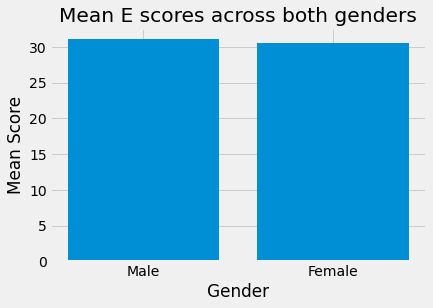

In [87]:
# Create a bar chart that shows the average total E score between the genders then set the scale for the y-axis
gender = ["Male", "Female"]
gender_E_Score = [mean_male["Total E Score"], mean_female["Total E Score"]]
gender_E_score_plot = plt.bar(gender, gender_E_Score)
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean E scores across both genders')

Text(0.5, 1.0, 'Mean N scores across both genders')

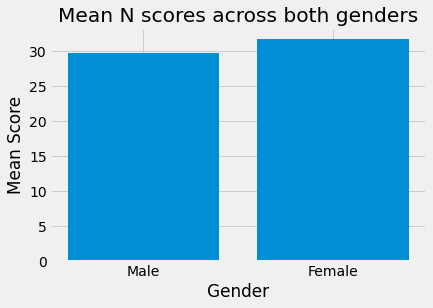

In [88]:
# Create a bar chart that shows the average total N score between the genders then set the scale for the y-axis
gender_N_Score = [mean_male["Total N Score"], mean_female["Total N Score"]]
gender_N_score_plot = plt.bar(gender, gender_N_Score)
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean N scores across both genders')

To find that females self-report as more emotionally stable was interesting. To see if this had any weight behind it we performed a permutation:

Text(0.5, 1.0, 'Distribution of male N score')

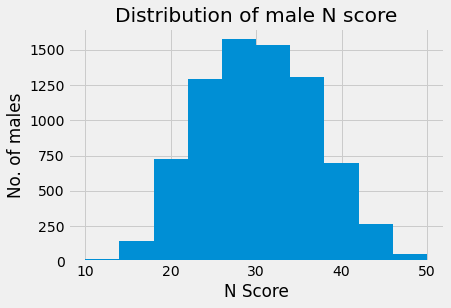

In [89]:
# Grab the number of both males and females, specifically for their total N Score
number_of_males = personality[personality['gender'] == 1]['Total N Score']
number_of_females = personality[personality['gender'] == 2]['Total N Score']

# Then create a histogram showing the distribution of men's total N score - with the N score total along the x-axis
# and the number of men on the y-axis
number_of_males.hist()
len(number_of_males)
plt.xlabel('N Score')
plt.ylabel('No. of males')
plt.title('Distribution of male N score')

Text(0.5, 1.0, 'Distribution of female N score')

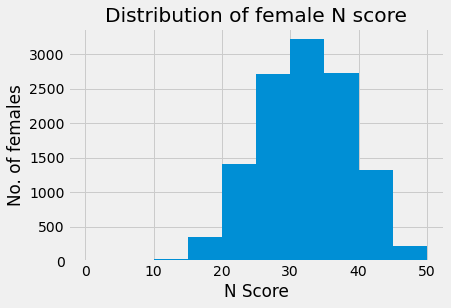

In [90]:
# Do the same as above for females
number_of_females.hist()
len(number_of_females)
plt.xlabel('N Score')
plt.ylabel('No. of females')
plt.title('Distribution of female N score')

In [91]:
# Calculate the mean difference between both males and females for total N score
observed_difference = mean_male['Total N Score'] - mean_female['Total N Score']
observed_difference

-1.969866258960522

In [92]:
# Pooling everyone together
pooled = np.append(number_of_males, number_of_females)
len(pooled)

19585

In [93]:
# Then we shuffle the total N score values
shuffle = np.random.permutation(pooled)
shuffle

array([36, 37, 27, ..., 24, 27, 20], dtype=int64)

In [94]:
# We then want know the number of men
n_males = len(number_of_males)
n_males

7604

In [95]:
# The first 7604 vales (new men)
fake_men = shuffle[:n_males]
# The rest (new women)
fake_women = shuffle[n_males:]
len(fake_women)

11981

In [96]:
# Now let's calculate the mean difference of our new, fake data
fake_diff = np.mean(fake_men) - np.mean(fake_women)
fake_diff

0.05756502898833915

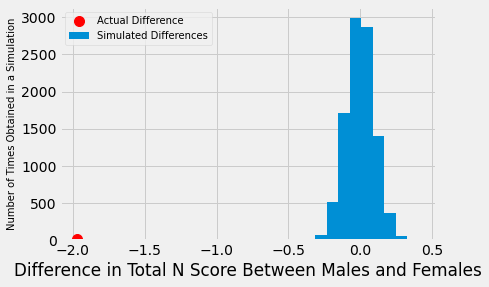

In [97]:
# The following code creates a for loop where it can shuffle the pooled array 10,000 times
stability_difference = np.zeros(10000)
for i in np.arange(10000):
    # Shuffle the data
    shuffle = np.random.permutation(pooled)
    # Split the data into two new fake groups
    fake_males = shuffle[:n_males]
    fake_females = shuffle[n_males:]
    # Recalculate the mean difference
    diff = np.mean(fake_males) - np.mean(fake_females)
    # Store the mean difference
    stability_difference[i] = diff

# Plot the histogram and add the actual difference to it in red
plt.hist(stability_difference, label = 'Simulated Differences')
fontsize = {'fontsize': 10}
plt.plot(observed_difference, 20, 'o', markersize = 10, color = 'red', label = 'Actual Difference')
plt.xlabel('Difference in Total N Score Between Males and Females')
plt.ylabel('Number of Times Obtained in a Simulation', **fontsize)
plt.legend(**fontsize)

In [98]:
# Proportion of sampling distribution compared to the observed values
# We did this to estimate probability
permutation_gender = np.count_nonzero(stability_difference >= observed_difference) / 10000
permutation_gender

1.0

In [99]:
# Standard deviation to measure the spread about the mean we found
sd_gender = np.std(stability_difference)
sd_gender

0.09838468840400634

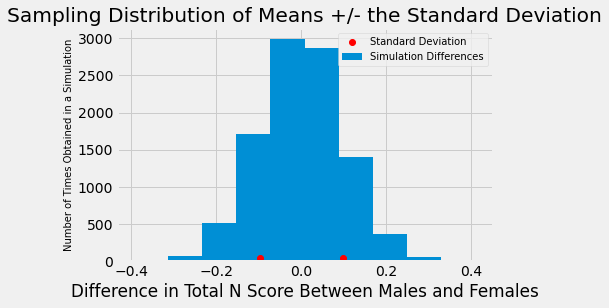

In [100]:
# Now plot the shuffled data again but this time with standard deviation
plt.hist(stability_difference, label = 'Simulation Differences')
fontsize = {'fontsize': 10}
fake_mean = np.mean(stability_difference)
plt.plot([fake_mean - sd_gender, fake_mean + sd_gender], [50, 50], 'or', label = 'Standard Deviation')
plt.title('Sampling Distribution of Means +/- the Standard Deviation')
plt.xlabel('Difference in Total N Score Between Males and Females')
plt.ylabel('Number of Times Obtained in a Simulation', **fontsize)
plt.legend(**fontsize)

In [101]:
# Now we do something similar to the t-test
like_t = observed_difference / sd_gender
like_t

-20.02208159537462

In [102]:
# Let's do the actual t-test now
male_errors = number_of_males - np.mean(number_of_males)
female_errors = number_of_females - np.mean(number_of_females)
all_errors = np.append(male_errors, female_errors)

n1 = len(number_of_males)
n2 = len(number_of_females)
est_error_sd = np.sqrt(np.sum(all_errors ** 2) / (n1 + n2 -2))
sampling_sd_estimate = est_error_sd * np.sqrt(1 / n1 + 1 / n2)
sampling_sd_estimate

0.09746802356872405

In [103]:
# Calculate the t_statistic
t_statistic = observed_difference / sampling_sd_estimate
t_statistic

-20.21038476861678

Research on self-reports of emotional intelligence shows that women perceive themselves to be more emotionally intelligent (Timmers, Fischer and Manstead, 2003) and that Men show less confidence in their own emotional intelligence (Fischer, Kret and Broekens, 2018) which can be compared to the results obtained here.

Text(0.5, 1.0, 'Mean A scores across both genders')

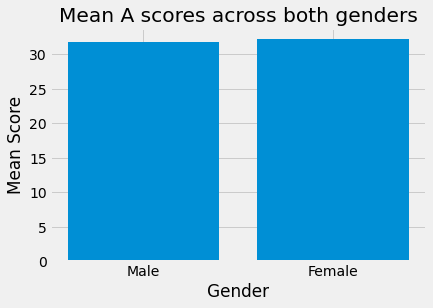

In [104]:
# Created a bar chart that shows the average total A score between the genders then set the scale for the y-axis
gender_A_Score = [mean_male["Total A Score"], mean_female["Total A Score"]]
gender_A_score_plot = plt.bar(gender, gender_A_Score)
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean A scores across both genders')

Text(0.5, 1.0, 'Mean C scores across both genders')

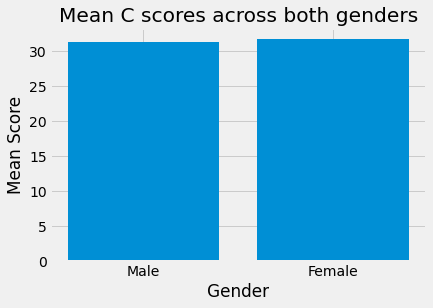

In [105]:
# Create a bar chart that shows the average total C score between the genders then set the scale for the y-axis
gender_C_Score = [mean_male["Total C Score"], mean_female["Total C Score"]]
gender_C_score_plot = plt.bar(gender, gender_C_Score)
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean C scores across both genders')

Text(0.5, 1.0, 'Mean O scores across both genders')

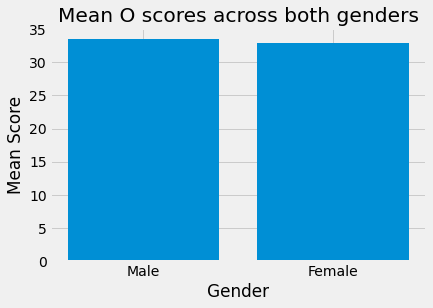

In [106]:
# Create a bar chart that shows the average total O score between the genders then set the scale for the y-axis
gender_O_Score = [mean_male["Total O Score"], mean_female["Total O Score"]]
gender_O_score_plot = plt.bar(gender, gender_O_Score)
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean O scores across both genders')

Text(0.5, 1.0, 'E Score across all ages and race')

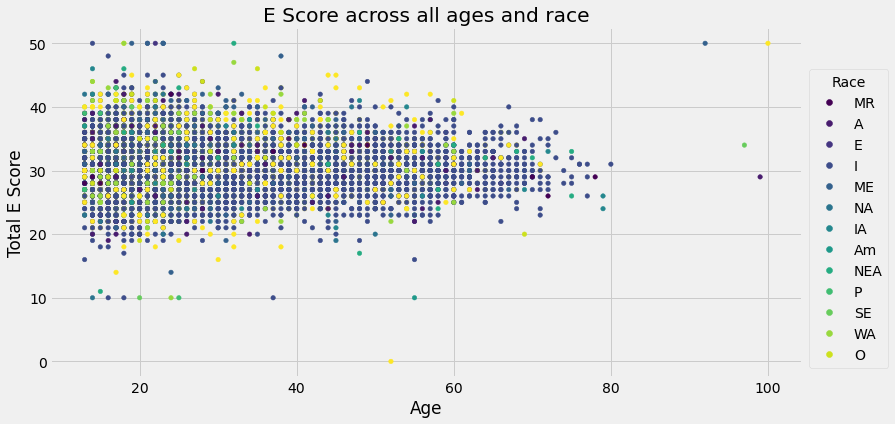

In [107]:
# Create a scatter plot that shows age on the x-axis, the Total E Score on the y-axis, and the different data points will
# be coloured to distinguish the different races
x_scatter_E = total_scores['age']
y_scatter_E = total_scores['Total E Score']
diff_races_E = total_scores['race']

# plt.figure changes the figure size
plt.figure(figsize = (12, 6))
# Plot and label the graph
scatter_race_E = plt.scatter(x_scatter_E, y_scatter_E, s = 20, c = diff_races_E.astype('category').cat.codes)
# Create an array containing all the races in it
races = ["MR", "A", "E", "I", "ME", "NA", "IA", "Am", "NEA", "P", "SE", "WA", "O"]
# Now plot the figure legend outside of the scatter and label the axis
plt.legend(handles = scatter_race_E.legend_elements()[0], labels = races, title = "Race", bbox_to_anchor = (1.0, 0.9))
plt.xlabel('Age')
plt.ylabel('Total E Score')
plt.title('E Score across all ages and race')

Intercept -3.1663928672592975e-09
Slope -0.02705492354288338


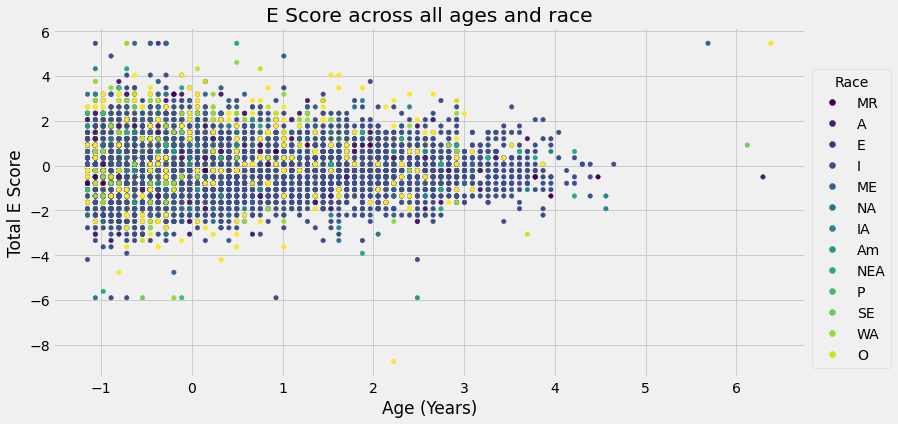

In [108]:
# Standard units (SU) and best c and s

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x))/np.std(x)

SU_x_scatter_E = standard_units(total_scores['age'])
SU_y_scatter_E = standard_units(total_scores['Total E Score'])
SU_diff_races_E = standard_units(total_scores['race'])

# plt.figure changes the figure size
plt.figure(figsize = (12, 6))
plt.scatter(SU_x_scatter_E, SU_y_scatter_E, s = 20, c = SU_diff_races_E)
plt.legend(handles = scatter_race_E.legend_elements()[0], labels = races, title = "Race", bbox_to_anchor = (1.0, 0.9))
plt.xlabel('Age (Years)')
plt.ylabel('Total E Score')
plt.title('E Score across all ages and race')

def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

from scipy.optimize import minimize
best_c, best_s = minimize(ss_any_line, [0, -0.5],
                          args=(SU_x_scatter_E, SU_y_scatter_E)).x
print('Intercept', best_c)
print('Slope', best_s)

In [109]:
# Attempt correlation

def correlation_minimize(t, x_name, y_name):
    """ Correlation by minimization
    """
    x = t[x_name]
    y = t[y_name]
    x_su, y_su = standard_units(x), standard_units(y)
    intercept, slope = minimize(ss_any_line, [0, 1], args=(x_su, y_su)).x
    if not np.isclose(intercept, 0):
        print('Oh dear, intercept not near 0')
    return slope

correlation_minimize(total_scores, 'age', 'Total E Score')

-0.027054926994078556

The r number is very close to 0, suggesting that there is no significant correlation between age, race, and Total E Score

Text(0.5, 1.0, 'N Score across all ages and race')

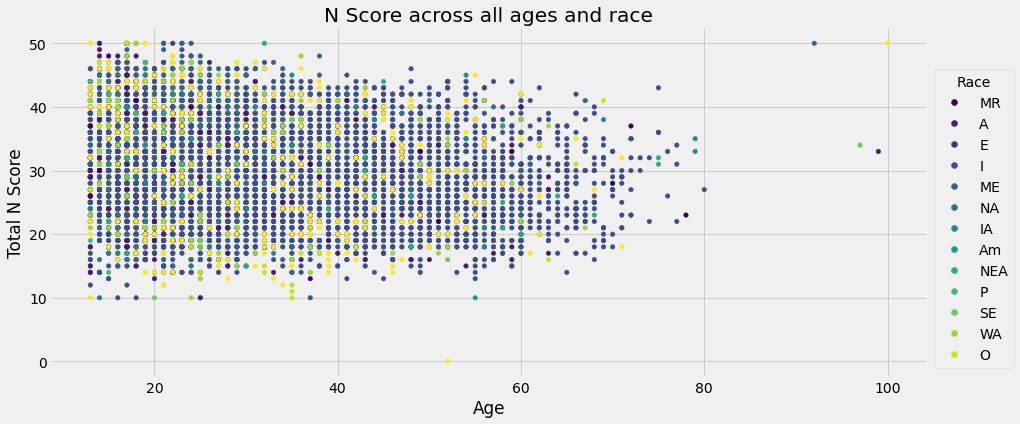

In [110]:
# Create a scatter plot that shows age on the x-axis, the Total N Score on the y-axis, and the different data points will
# be coloured to distinguish the different races
x_scatter_N = total_scores['age']
y_scatter_N = total_scores['Total N Score']
diff_races_N = total_scores['race']

plt.figure(figsize = (14, 6))
scatter_race_N = plt.scatter(x_scatter_N, y_scatter_N, s = 20, c = diff_races_N.astype('category').cat.codes)
plt.legend(handles = scatter_race_N.legend_elements()[0], labels = races, title = "Race", bbox_to_anchor = (1.0, 0.9))
plt.xlabel('Age')
plt.ylabel('Total N Score')
plt.title('N Score across all ages and race')

In [148]:
correlation_minimize(total_scores, 'age', 'Total N Score')

-0.19245289251065684

The r number is close to 0 but slightly more negative than the previous one which could suggest a very weak negative correlation.

Text(0.5, 1.0, 'A Score across all ages and race')

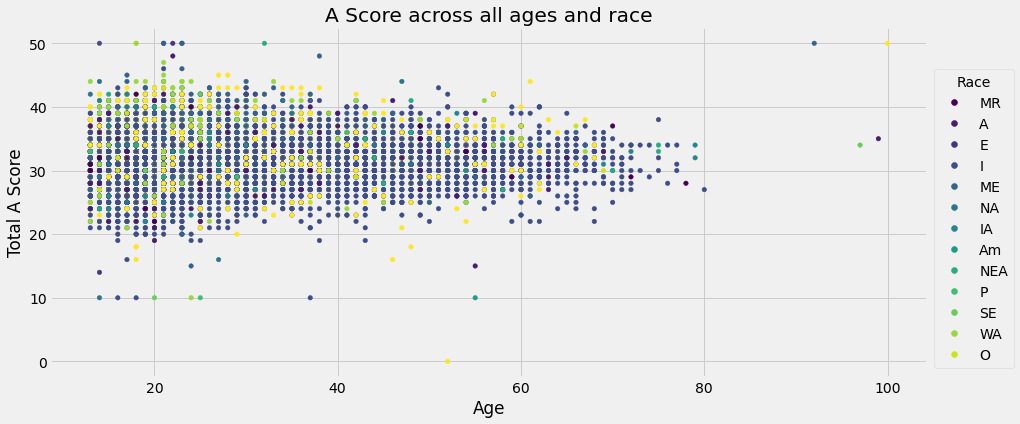

In [111]:
# Create a scatter plot that shows age on the x-axis, the Total A Score on the y-axis, and the different data points will
# be coloured to distinguish the different races
x_scatter_A = total_scores['age']
y_scatter_A = total_scores['Total A Score']
diff_races_A = total_scores['race']

plt.figure(figsize = (14, 6))
scatter_race_A = plt.scatter(x_scatter_A, y_scatter_A, s = 20, c = diff_races_A.astype('category').cat.codes)
plt.legend(handles = scatter_race_A.legend_elements()[0], labels = races, title = "Race", bbox_to_anchor = (1.0, 0.9))
plt.xlabel('Age')
plt.ylabel('Total A Score')
plt.title('A Score across all ages and race')

In [149]:
correlation_minimize(total_scores, 'age', 'Total A Score')

-0.01530259837192447

The r number is very close to 0 suggesting there is no significant correlation.

Text(0.5, 1.0, 'C Score across all ages and race')

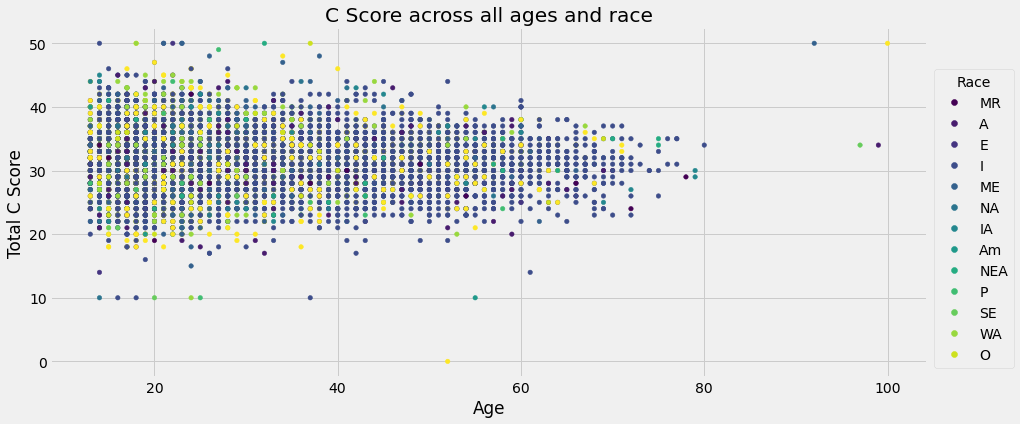

In [112]:
# Create a scatter plot that shows age on the x-axis, the Total C Score on the y-axis, and the different data points will
# be coloured to distinguish the different races
x_scatter_C = total_scores['age']
y_scatter_C = total_scores['Total C Score']
diff_races_C = total_scores['race']

plt.figure(figsize = (14, 6))
scatter_race_C = plt.scatter(x_scatter_C, y_scatter_C, s = 20, c = diff_races_C)
plt.legend(handles = scatter_race_C.legend_elements()[0], labels = races, title = "Race", bbox_to_anchor = (1.0, 0.9))
plt.xlabel('Age')
plt.ylabel('Total C Score')
plt.title('C Score across all ages and race')

In [150]:
correlation_minimize(total_scores, 'age', 'Total C Score')

-0.038877693112229904

The r number is very close to 0 suggesting there is no significant correlation.

Text(0.5, 1.0, 'O Score across all ages and race')

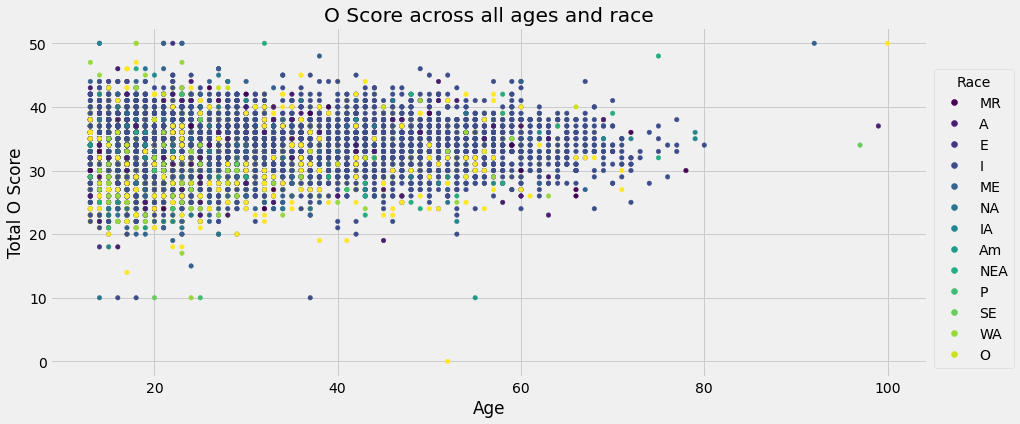

In [113]:
# Create a scatter plot that shows age on the x-axis, the Total O Score on the y-axis, and the different data points will
# be coloured to distinguish the different races
x_scatter_O = total_scores['age']
y_scatter_O = total_scores['Total O Score']
diff_races_O = total_scores['race']

plt.figure(figsize = (14, 6))
scatter_race_O = plt.scatter(x_scatter_O, y_scatter_O, s = 20, c = diff_races_O.astype('category').cat.codes)
plt.legend(handles = scatter_race_O.legend_elements()[0], labels = races, title = "Race", bbox_to_anchor = (1.0, 0.9))
plt.xlabel('Age')
plt.ylabel('Total O Score')
plt.title('O Score across all ages and race')

In [151]:
correlation_minimize(total_scores, 'age', 'Total O Score')

0.08074047448518569

The r number is very close to 0 suggesting there is no significant correlation.

Text(0.5, 1.0, 'E Score across all ages and gender')

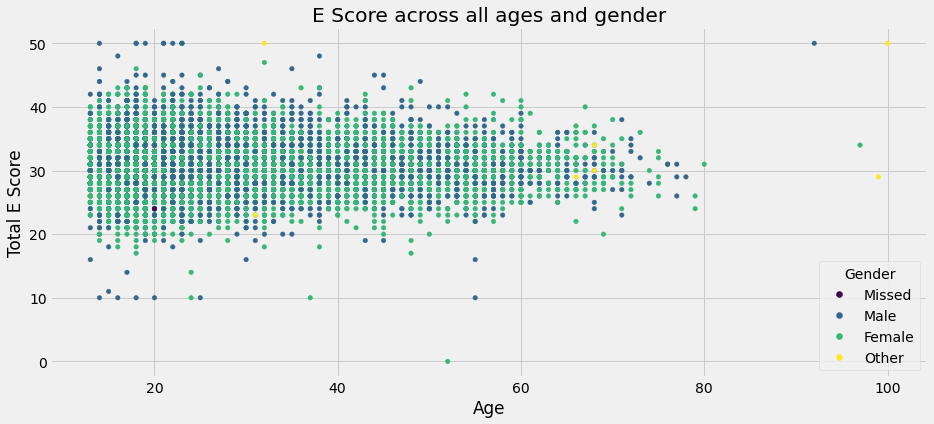

In [114]:
# Create a scatter plot that shows age on the x-axis, the Total E Score on the y-axis, and the different data points will
# be coloured to distinguish the different genders
x_scatter_E = total_scores['age']
y_scatter_E = total_scores['Total E Score']
diff_genders_E = total_scores['gender']

plt.figure(figsize = (14, 6))
# Create and name your plot, assigning the colours of the scatter to be be different genders
scatter_E = plt.scatter(x_scatter_E, y_scatter_E, s = 20, c = diff_genders_E.astype('category').cat.codes)
# Name the different genders
gends = ['Missed', 'Male', 'Female', 'Other']
# Now plot the graph with the figure legend
plt.legend(handles = scatter_E.legend_elements()[0], labels = gends, title = "Gender")
plt.xlabel('Age')
plt.ylabel('Total E Score')
plt.title('E Score across all ages and gender')

In [152]:
correlation_minimize(total_scores, 'gender', 'Total E Score')

-0.07690903308191334

The r number is very close to 0 suggesting there is no significant correlation.

Text(0.5, 1.0, 'N Score across all ages and gender')

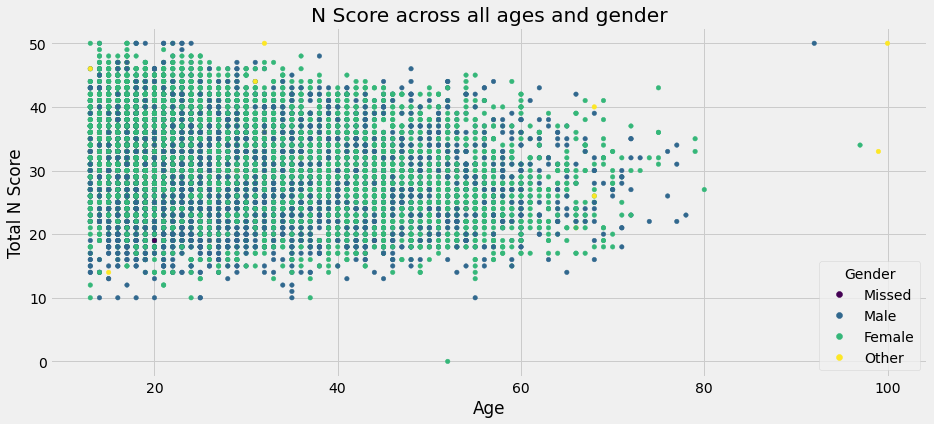

In [115]:
# Create a scatter plot that shows age on the x-axis, the Total N Score on the y-axis, and the different data points will
# be coloured to distinguish the different genders
x_scatter_N = total_scores['age']
y_scatter_N = total_scores['Total N Score']
diff_genders_N = total_scores['gender']

plt.figure(figsize = (14, 6))
scatter_N = plt.scatter(x_scatter_N, y_scatter_N, s = 20, c = diff_genders_N.astype('category').cat.codes)
plt.legend(handles = scatter_N.legend_elements()[0], labels = gends, title = "Gender")
plt.xlabel('Age')
plt.ylabel('Total N Score')
plt.title('N Score across all ages and gender')

In [153]:
correlation_minimize(total_scores, 'gender', 'Total N Score')

0.14443804857700418

The r number is close to 0 but slightly more positive which could suggest a very weak positive correlation.

Text(0.5, 1.0, 'A Score across all ages and gender')

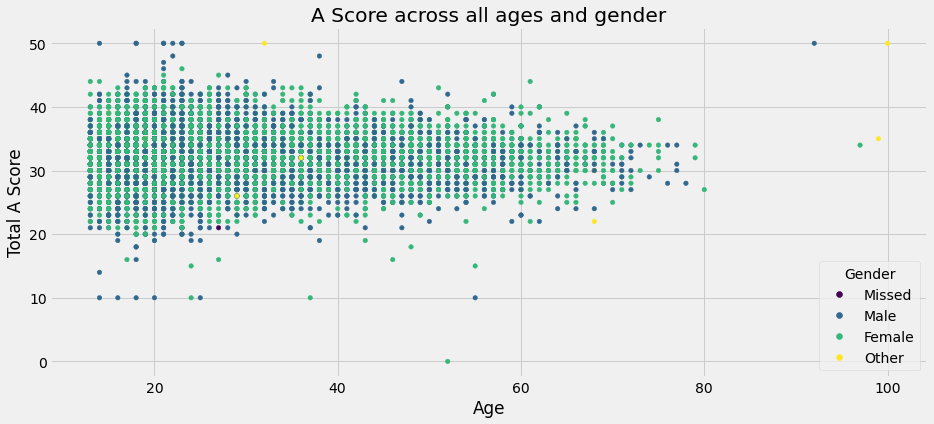

In [116]:
# Create a scatter plot that shows age on the x-axis, the Total A Score on the y-axis, and the different data points will
# be coloured to distinguish the different genders
x_scatter_A = total_scores['age']
y_scatter_A = total_scores['Total A Score']
diff_genders_A = total_scores['gender']

plt.figure(figsize = (14, 6))
scatter_A = plt.scatter(x_scatter_A, y_scatter_A, s = 20, c = diff_genders_A.astype('category').cat.codes)
plt.legend(handles = scatter_A.legend_elements()[0], labels = gends, title = "Gender")
plt.xlabel('Age')
plt.ylabel('Total A Score')
plt.title('A Score across all ages and gender')

In [155]:
correlation_minimize(total_scores, 'gender', 'Total A Score')

0.057532133207684674

The r number is very close to 0 suggesting there is no significant correlation.

Text(0.5, 1.0, 'C Score across all ages and gender')

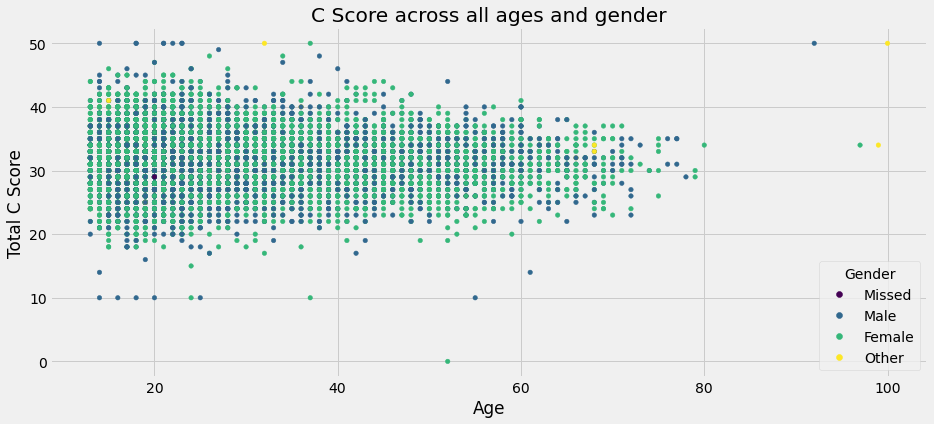

In [117]:
# Create a scatter plot that shows age on the x-axis, the Total C Score on the y-axis, and the different data points will
# be coloured to distinguish the different genders
x_scatter_C = total_scores['age']
y_scatter_C = total_scores['Total C Score']
diff_genders_C = total_scores['gender']

plt.figure(figsize = (14, 6))
scatter_C = plt.scatter(x_scatter_C, y_scatter_C, s = 20, c = diff_genders_C.astype('category').cat.codes)
plt.legend(handles = scatter_C.legend_elements()[0], labels = gends, title = "Gender")
plt.xlabel('Age')
plt.ylabel('Total C Score')
plt.title('C Score across all ages and gender')

In [156]:
correlation_minimize(total_scores, 'gender', 'Total C Score')

0.04699561597962921

The r number is very close to 0 suggesting there is no significant correlation.

Text(0.5, 1.0, 'O Score across all ages and gender')

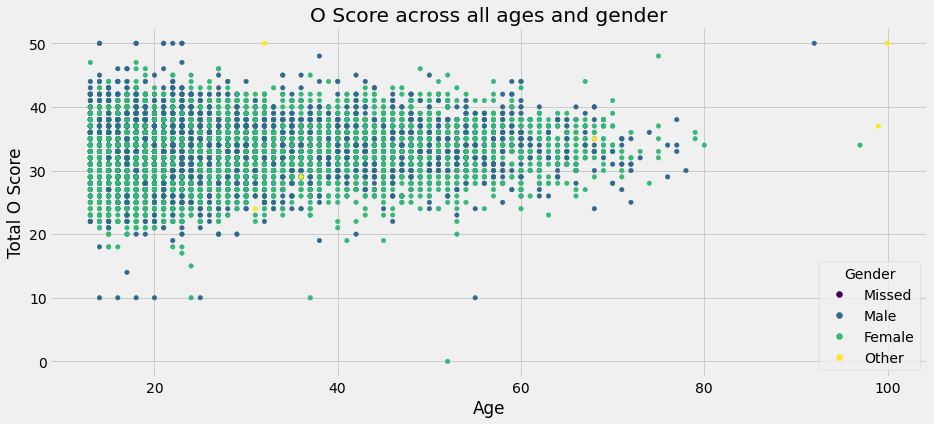

In [118]:
# Create a scatter plot that shows age on the x-axis, the Total O Score on the y-axis, and the different data points will
# be coloured to distinguish the different genders
x_scatter_O = total_scores['age']
y_scatter_O = total_scores['Total O Score']
diff_genders_O = total_scores['gender']

plt.figure(figsize = (14, 6))
scatter_O = plt.scatter(x_scatter_O, y_scatter_O, s = 20, c = diff_genders_O.astype('category').cat.codes)
plt.legend(handles = scatter_O.legend_elements()[0], labels = gends, title = "Gender")
plt.xlabel('Age')
plt.ylabel('Total O Score')
plt.title('O Score across all ages and gender')

In [157]:
correlation_minimize(total_scores, 'gender', 'Total O Score')

-0.0653771154693993

The r number is very close to 0 suggesting there is no significant correlation.

This section of coding looks to highlight any relationship between dominant hand usage and personality traits, for example, perhaps a left handed person is more creative. 

In [119]:
# Create a boolean which selects left handedness.
left = total_scores['hand'] == 1
left = total_scores[left]
left.head()

mean_left = np.mean(left)
mean_left

race              5.354137
age              26.250962
engnat            1.377447
gender            1.620601
hand              1.000000
Total E Score    30.766033
Total N Score    30.968192
Total A Score    32.059999
Total C Score    31.520124
Total O Score    33.059827
dtype: float64

In [120]:
left.corr()

,race,age,engnat,gender,hand,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
race,1.000000,-0.082563,0.220152,0.047021,NaN,0.082908,0.046148,0.100894,0.018126,-0.123140
age,-0.082563,1.000000,-0.073054,-0.037310,NaN,-0.031486,-0.197009,-0.019366,-0.036011,0.085633
engnat,0.220152,-0.073054,1.000000,-0.091733,NaN,0.025013,0.083751,0.078091,0.001375,-0.081014
gender,0.047021,-0.037310,-0.091733,1.000000,NaN,-0.078355,0.147273,0.055576,0.045809,-0.064795
hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total E Score,0.082908,-0.031486,0.025013,-0.078355,NaN,1.000000,0.000466,0.265739,0.167431,0.079648
Total N Score,0.046148,-0.197009,0.083751,0.147273,NaN,0.000466,1.000000,0.180332,0.191126,0.085579
Total A Score,0.100894,-0.019366,0.078091,0.055576,NaN,0.265739,0.180332,1.000000,0.205216,0.146729
Total C Score,0.018126,-0.036011,0.001375,0.045809,NaN,0.167431,0.191126,0.205216,1.000000,0.268241
Total O Score,-0.123140,0.085633,-0.081014,-0.064795,NaN,0.079648,0.085579,0.146729,0.268241,1.000000


In [121]:
# Create a boolean which selects right handed
right = total_scores['hand'] == 2
right = total_scores[right]
right.head()

mean_right = np.mean(right)
mean_right

race              5.015081
age              26.679814
engnat            1.270882
gender            1.580626
hand              2.000000
Total E Score    30.700116
Total N Score    30.961717
Total A Score    31.830626
Total C Score    31.627610
Total O Score    33.488399
dtype: float64

In [122]:
right.corr()

,race,age,engnat,gender,hand,Total E Score,Total N Score,Total A Score,Total C Score,Total O Score
race,1.000000,-0.150624,0.208413,0.049916,NaN,0.078369,0.060678,0.090960,-0.020240,-0.120539
age,-0.150624,1.000000,-0.098490,-0.020234,NaN,-0.032401,-0.167764,-0.034009,-0.084750,0.037652
engnat,0.208413,-0.098490,1.000000,0.004698,NaN,0.025599,0.074789,0.072734,0.002997,-0.058220
gender,0.049916,-0.020234,0.004698,1.000000,NaN,-0.079891,0.128793,0.084629,0.065518,-0.073632
hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total E Score,0.078369,-0.032401,0.025599,-0.079891,NaN,1.000000,-0.043991,0.264508,0.131851,0.064421
Total N Score,0.060678,-0.167764,0.074789,0.128793,NaN,-0.043991,1.000000,0.194239,0.205048,0.103173
Total A Score,0.090960,-0.034009,0.072734,0.084629,NaN,0.264508,0.194239,1.000000,0.197673,0.152003
Total C Score,-0.020240,-0.084750,0.002997,0.065518,NaN,0.131851,0.205048,0.197673,1.000000,0.279399
Total O Score,-0.120539,0.037652,-0.058220,-0.073632,NaN,0.064421,0.103173,0.152003,0.279399,1.000000


Text(0.5, 1.0, 'Average E Score across left/right handed people')

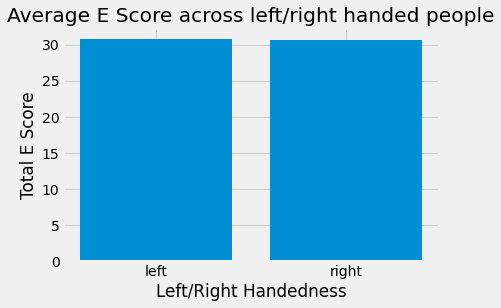

In [123]:
# We want to create a bar chart to compare each handedness to the mean of E personality score
hand = ["left", "right"]
hand_E_Score = [mean_left["Total E Score"], mean_right["Total E Score"]]
hand_E_score_plot = plt.bar(hand, hand_E_Score)
plt.xlabel('Left/Right Handedness')
plt.ylabel('Total E Score')
plt.title('Average E Score across left/right handed people')

Text(0.5, 1.0, 'Average N Score across left/right handed people')

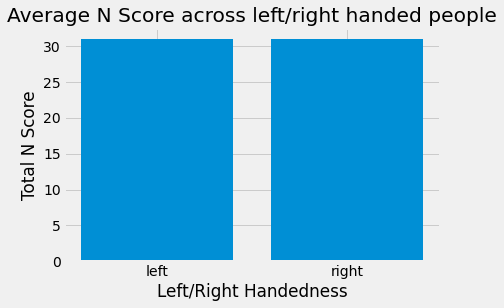

In [124]:
# We want to create a bar chart to compare each handedness to the mean of N personality score
hand_N_Score = [mean_left["Total N Score"], mean_right["Total N Score"]]
hand_N_score_plot = plt.bar(hand, hand_N_Score)
plt.xlabel('Left/Right Handedness')
plt.ylabel('Total N Score')
plt.title('Average N Score across left/right handed people')

Text(0.5, 1.0, 'Average A Score across left/right handed people')

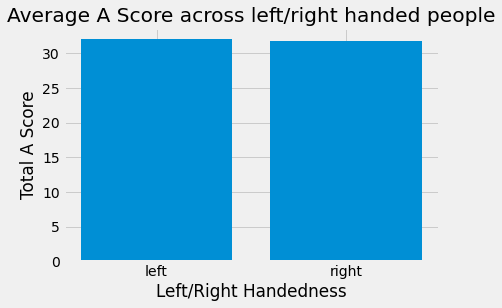

In [125]:
# We want to create a bar chart to compare each handedness to the mean of A personality score
hand_A_Score = [mean_left["Total A Score"], mean_right["Total A Score"]]
hand_A_score_plot = plt.bar(hand, hand_A_Score)
plt.xlabel('Left/Right Handedness')
plt.ylabel('Total A Score')
plt.title('Average A Score across left/right handed people')

Text(0.5, 1.0, 'Average C Score across left/right handed people')

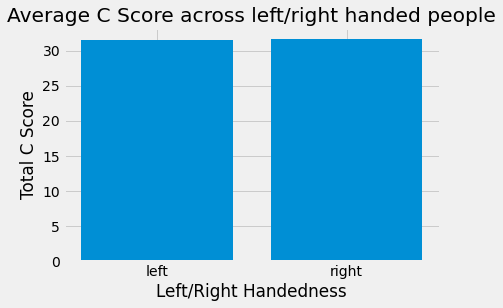

In [126]:
# We want to create a bar chart to compare each handedness to the mean of C personality score
hand_C_Score = [mean_left["Total C Score"], mean_right["Total C Score"]]
hand_C_score_plot = plt.bar(hand, hand_C_Score)
plt.xlabel('Left/Right Handedness')
plt.ylabel('Total C Score')
plt.title('Average C Score across left/right handed people')

Text(0.5, 1.0, 'Average O Score across left/right handed people')

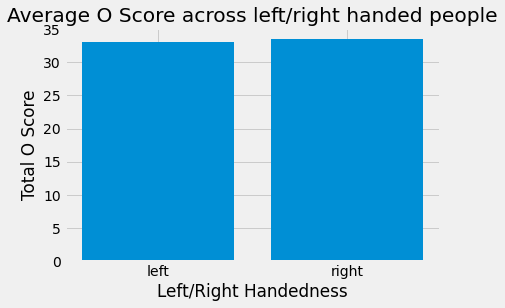

In [127]:
# We want to create a bar chart to compare each handedness to the mean of O personality score
hand_O_Score = [mean_left["Total O Score"], mean_right["Total O Score"]]
hand_O_score_plot = plt.bar(hand, hand_O_Score)
plt.xlabel('Left/Right Handedness')
plt.ylabel('Total O Score')
plt.title('Average O Score across left/right handed people') 

Research has shown that left handers report themselves to be higher when it comes to dominance and lower for nurturance e.g. rate themselves higher on the arrogant non-agreeableness factors. This pattern has been seen in studies involving other minority groups and may not be exclusive to handedness (Coren, 1994).

Another study also assessed the Big 5 personality traits and found that there were no differences between Left- and right-handers, but in an independent study, they did find that left handers believed themselves to be more introverted than right-handers (Grimshaw and Wilson, 2013).

No significant differences were seen in our results which corresponds to those of Grimshaw and Wilson, 2013.
 
The validity of self-reported questionnaires must be explored when analysing such data. Disadvantages include social desirability bias which is the occurrence of invalid answers due to participants answering in a way they think is socially acceptable, rather than truthfully. In addition to this, there may be individuals that are trying to be truthful but lack introspective ability and do not recognise a particular trait in themselves, even though others around them would. Another problem is the possible variation of interpretations of questions which would result in unwanted variation in answers. Furthermore, certain participants may respond more extremely on the scale despite having the same self-perception as another individual, solely due to different mentalities and their subsequent way of using the scale (Demetriou, Ozer and Essau, 2015). These limitations show that it is important to highlight that the data analysed here is based on self-perception alone and may not reflect the true nature of different populations.

References:

Coren, S., 1994. Personality Differences between Left- and Right-Handers: An Overlooked Minority Group?. Journal of Research in Personality, 28(2), pp.214-229.

Demetriou, C., Ozer, B. and Essau, C., 2015. Self-Report Questionnaires. The Encyclopedia of Clinical Psychology, pp.1-6.

Fischer, A., Kret, M. and Broekens, J., 2018. Gender differences in emotion perception and self-reported emotional intelligence: A test of the emotion sensitivity hypothesis. PLOS ONE, 13(1), p.e0190712.

Freeman, M., 2000. Endangered peoples of the Arctic. Westport, Conn.: Greenwood Press.

Grimshaw, G. and Wilson, M., 2013. A sinister plot? Facts, beliefs, and stereotypes about the left-handed personality. Laterality: Asymmetries of Body, Brain and Cognition, 18(2), pp.135-151.

Lee, J., Lyoo, I., Kim, S., Jang, H., Lee, D., Jeon, H., Park, S. and Cho, M., 2005. Intellect declines in healthy elderly subjects and cerebellum. Psychiatry and Clinical Neurosciences, 59(1), pp.45-51.

Timmers, M., Fischer, A. and Manstead, A., 2003. Ability versus vulnerability: Beliefs about men's and women's emotional behaviour. Cognition and Emotion, 17(1), pp.41-63.